In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import folium
%matplotlib inline
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from scipy import stats

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.shape

(1460, 81)

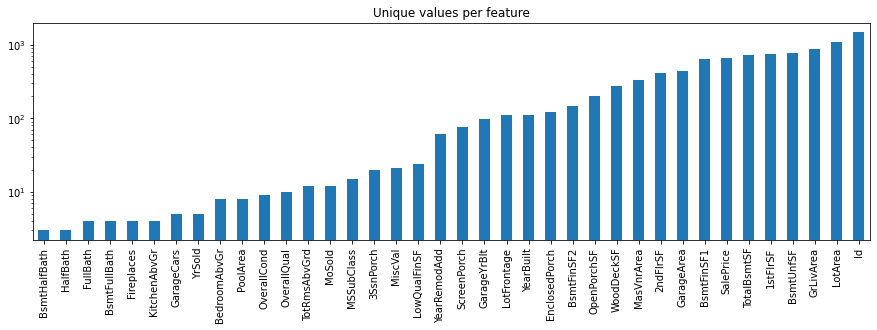

In [6]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()

unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

In [7]:
n_duplicates = df.drop(labels=["Id"], axis=1).duplicated().sum()
print(f"There are {n_duplicates} duplicates in dataset.")

There are 0 duplicates in dataset.


In [8]:
coordinates_latitude = {
    'Blmngtn': 42.056593831096365,
    'Blueste': 42.00958101697704, 
    'BrDale':  42.05297820753384, 
    'BrkSide': 42.02880449929659, 
    'ClearCr': 42.03657397883218, 
    'CollgCr': 42.02279411036844, 
    'Crawfor': 42.02116250946755, 
    'Edwards': 42.01566960171523, 
    'Gilbert': 42.10691318337364, 
    'IDOTRR':  42.03666810377849, 
    'MeadowV': 41.99264834319078, 
    'Mitchel': 41.99094631946181, 
    'NAmes':   42.035217770905255,
    'NoRidge': 42.053653373719825,
    'NPkVill': 42.02505591810293, 
    'NridgHt': 42.059956387401236,
    'NWAmes':  42.03843654463088, 
    'OldTown': 42.02927709250526, 
    'SWISU':   42.02385001914031, 
    'Sawyer':  42.03434893209798, 
    'SawyerW': 42.0230605002559,
    'Somerst': 42.05282526249589, 
    'StoneBr': 42.05942644487233, 
    'Timber':  42.000132640657014,
    'Veenker': 42.04347796867545
}

df['Latitude'] = df['Neighborhood'].map(coordinates_latitude)
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal MoSold  \
0            Lvl    AllPub  ...    NaN    NaN         NaN       0      2   
1            Lvl    AllPub  ...    NaN    NaN         NaN       0      5   
2            Lvl    AllPub  ...    NaN    NaN         NaN       0      9   
3            Lvl    AllPub  ...    NaN    NaN         NaN       0      2   
4            Lvl    AllPub  ...    NaN    NaN         NaN       0     12   
...          ...       ...  ...    ...    ...         ...     ...    ...   
1455         Lvl    AllPub  ...    NaN    NaN         NaN       0      8   
1456         Lvl    AllPub  ...    NaN  MnPrv         NaN       0      2   
1457         Lvl    AllPub  ...    NaN  GdPrv        Shed    2500      5   
1458         Lvl    AllPub  ...    NaN    NaN         NaN       0      4   
1459         Lvl    AllPub  ...    NaN    NaN         NaN       0      6   

     YrSold SaleType  SaleCondition  SalePrice   Latitude  
0      2008       WD         Normal     208500  42.022794  
1      2007       WD         Normal     181500  42.043478  
2      2008       WD         Normal     223500  42.022794  
3      2006       WD        Abnorml     140000  42.021163  
4      2008       WD         Normal     250000  42.053653  
...     ...      ...            ...        ...        ...  
1455   2007       WD         Normal     175000  42.106913  
1456   2010       WD         Normal     210000  42.038437  
1457   2010       WD         Normal     266500  42.021163  
1458   2010       WD         Normal     142125  42.035218  
1459   2008       WD         Normal     147500  42.015670  

[1460 rows x 82 columns]

In [9]:
coordinates_longitude = {
    'Blmngtn': -93.63524713132111,
    'Blueste': -93.64663684481653,
    'BrDale':  -93.62882100248581,
    'BrkSide': -93.63040696015759,
    'ClearCr': -93.64900179963674,
    'CollgCr': -93.65154241331666,
    'Crawfor': -93.6489680624659,
    'Edwards': -93.68590558658853,
    'Gilbert': -93.64985805420264,
    'IDOTRR':  -93.61135345555746,
    'MeadowV': -93.6026366898297,
    'Mitchel': -93.60108548899446,
    'NAmes':   -93.64755130248649,
    'NoRidge': -93.64860381597944,
    'NPkVill': -93.61899657365139,
    'NridgHt': -93.64950348899191,
    'NWAmes':  -93.62574884481545,
    'OldTown': -93.61434010248672,
    'SWISU':   -93.6456436394206,
    'Sawyer':  -93.6770658024865,
    'SawyerW': -93.693795409969,
    'Somerst': -93.64514357577995,
    'StoneBr': -93.63334903356377,
    'Timber':  -93.6497354178296,
    'Veenker': -93.65069642276987
}

df['Longitude'] = df['Neighborhood'].map(coordinates_longitude)
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ...  Fence MiscFeature MiscVal MoSold YrSold  \
0            Lvl    AllPub  ...    NaN         NaN       0      2   2008   
1            Lvl    AllPub  ...    NaN         NaN       0      5   2007   
2            Lvl    AllPub  ...    NaN         NaN       0      9   2008   
3            Lvl    AllPub  ...    NaN         NaN       0      2   2006   
4            Lvl    AllPub  ...    NaN         NaN       0     12   2008   
...          ...       ...  ...    ...         ...     ...    ...    ...   
1455         Lvl    AllPub  ...    NaN         NaN       0      8   2007   
1456         Lvl    AllPub  ...  MnPrv         NaN       0      2   2010   
1457         Lvl    AllPub  ...  GdPrv        Shed    2500      5   2010   
1458         Lvl    AllPub  ...    NaN         NaN       0      4   2010   
1459         Lvl    AllPub  ...    NaN         NaN       0      6   2008   

     SaleType SaleCondition  SalePrice   Latitude  Longitude  
0          WD        Normal     208500  42.022794 -93.651542  
1          WD        Normal     181500  42.043478 -93.650696  
2          WD        Normal     223500  42.022794 -93.651542  
3          WD       Abnorml     140000  42.021163 -93.648968  
4          WD        Normal     250000  42.053653 -93.648604  
...       ...           ...        ...        ...        ...  
1455       WD        Normal     175000  42.106913 -93.649858  
1456       WD        Normal     210000  42.038437 -93.625749  
1457       WD        Normal     266500  42.021163 -93.648968  
1458       WD        Normal     142125  42.035218 -93.647551  
1459       WD        Normal     147500  42.015670 -93.685906  

[1460 rows x 83 columns]

Text(0, 0.5, 'Sample Number')

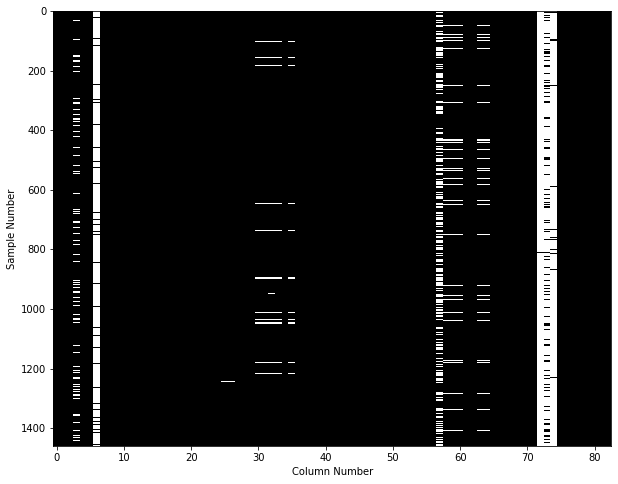

In [10]:
plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")

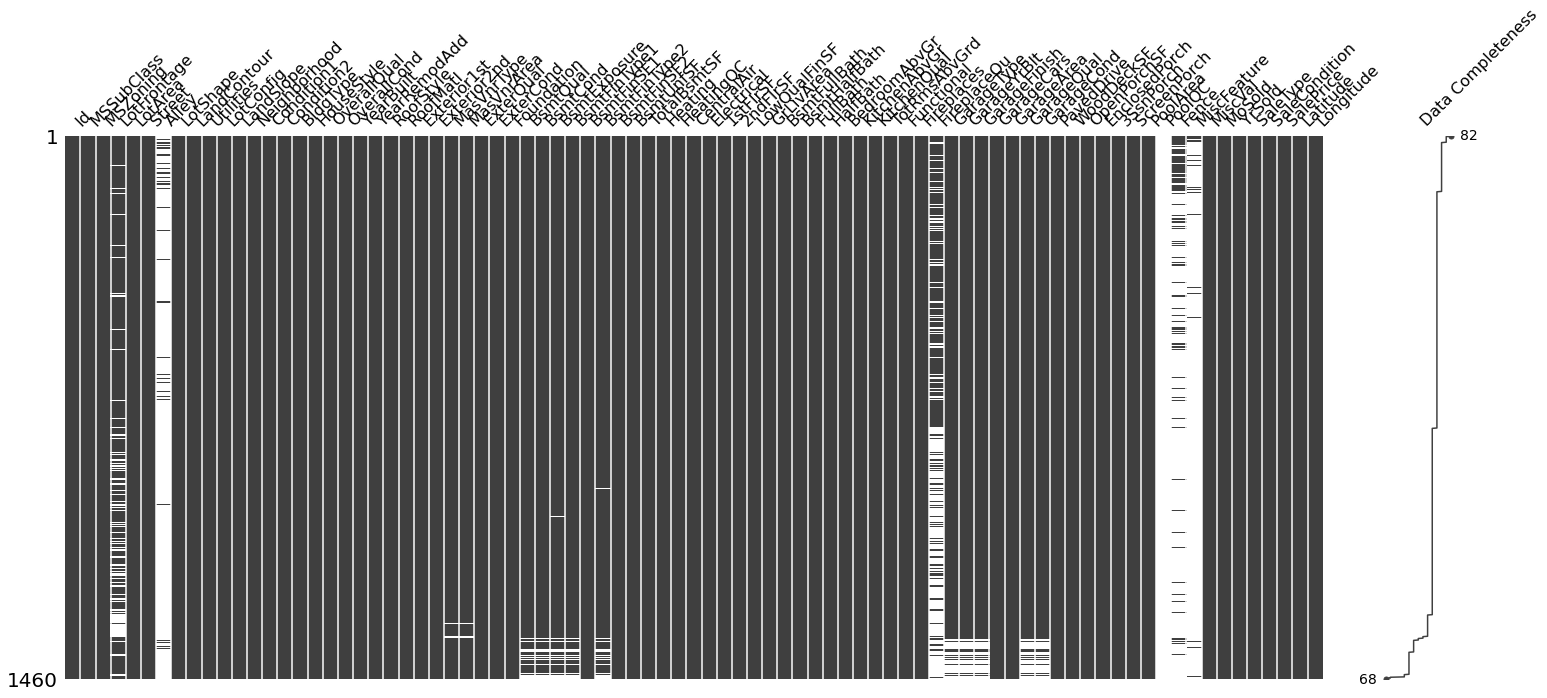

In [11]:
import missingno as msno

msno.matrix(df, labels=True, sort="descending");

<AxesSubplot:title={'center':'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

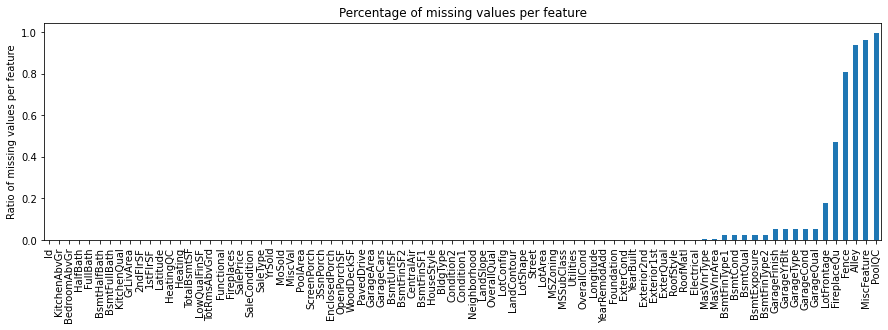

In [12]:
df.isna().mean().sort_values().plot(kind="bar", figsize=(15, 4),title="Percentage of missing values per feature",ylabel="Ratio of missing values per feature")

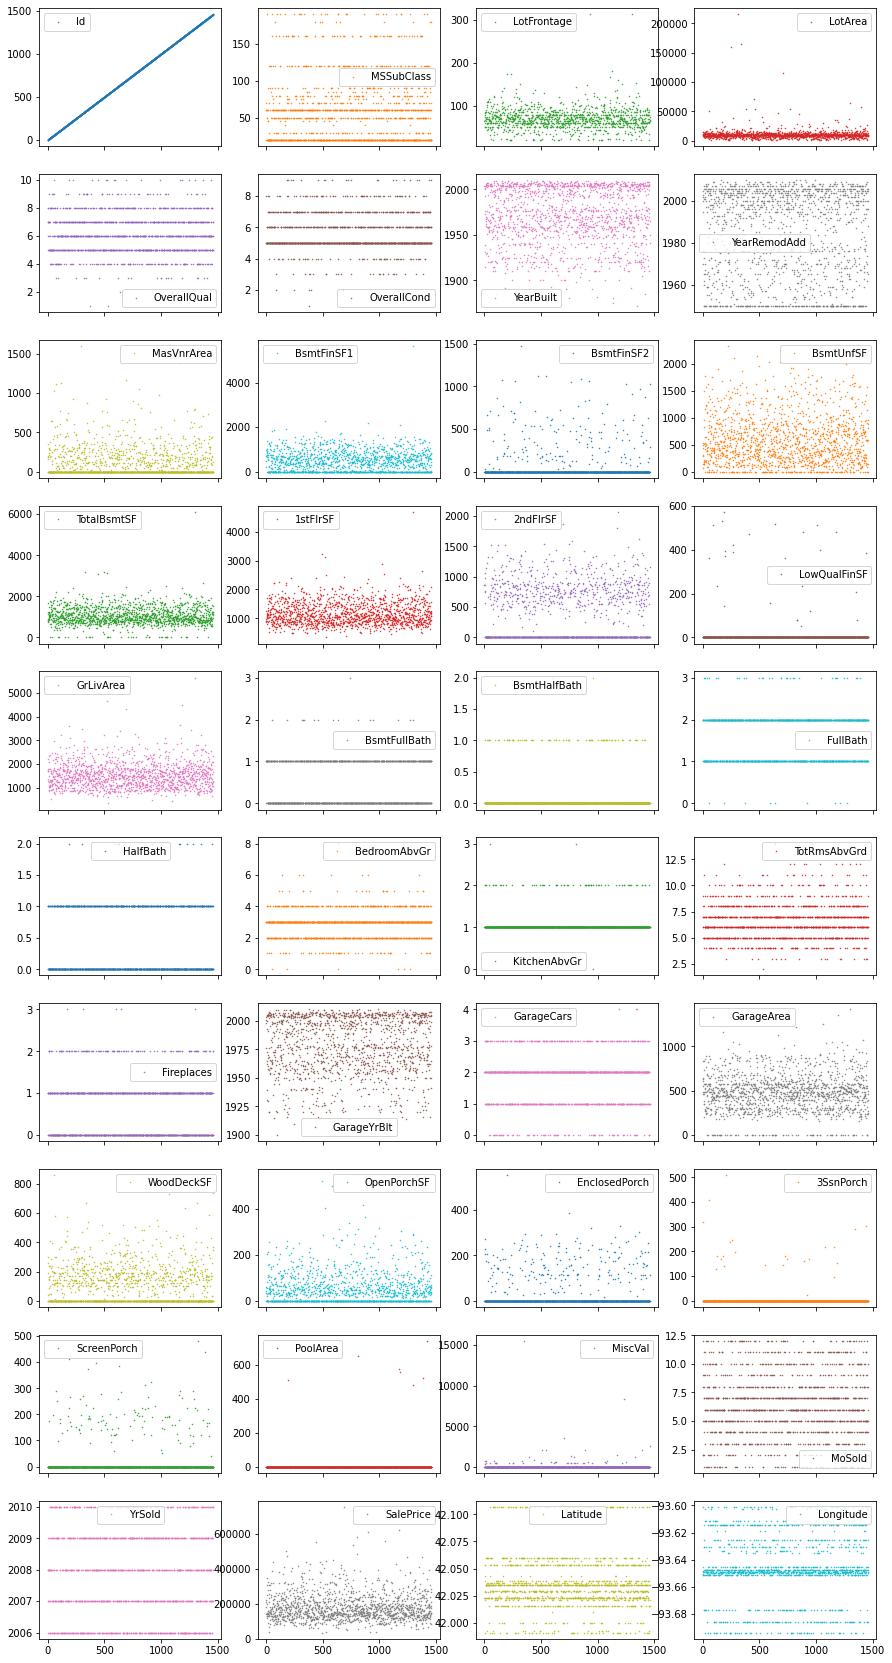

In [13]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4), figsize=(15, 30), markersize=1);

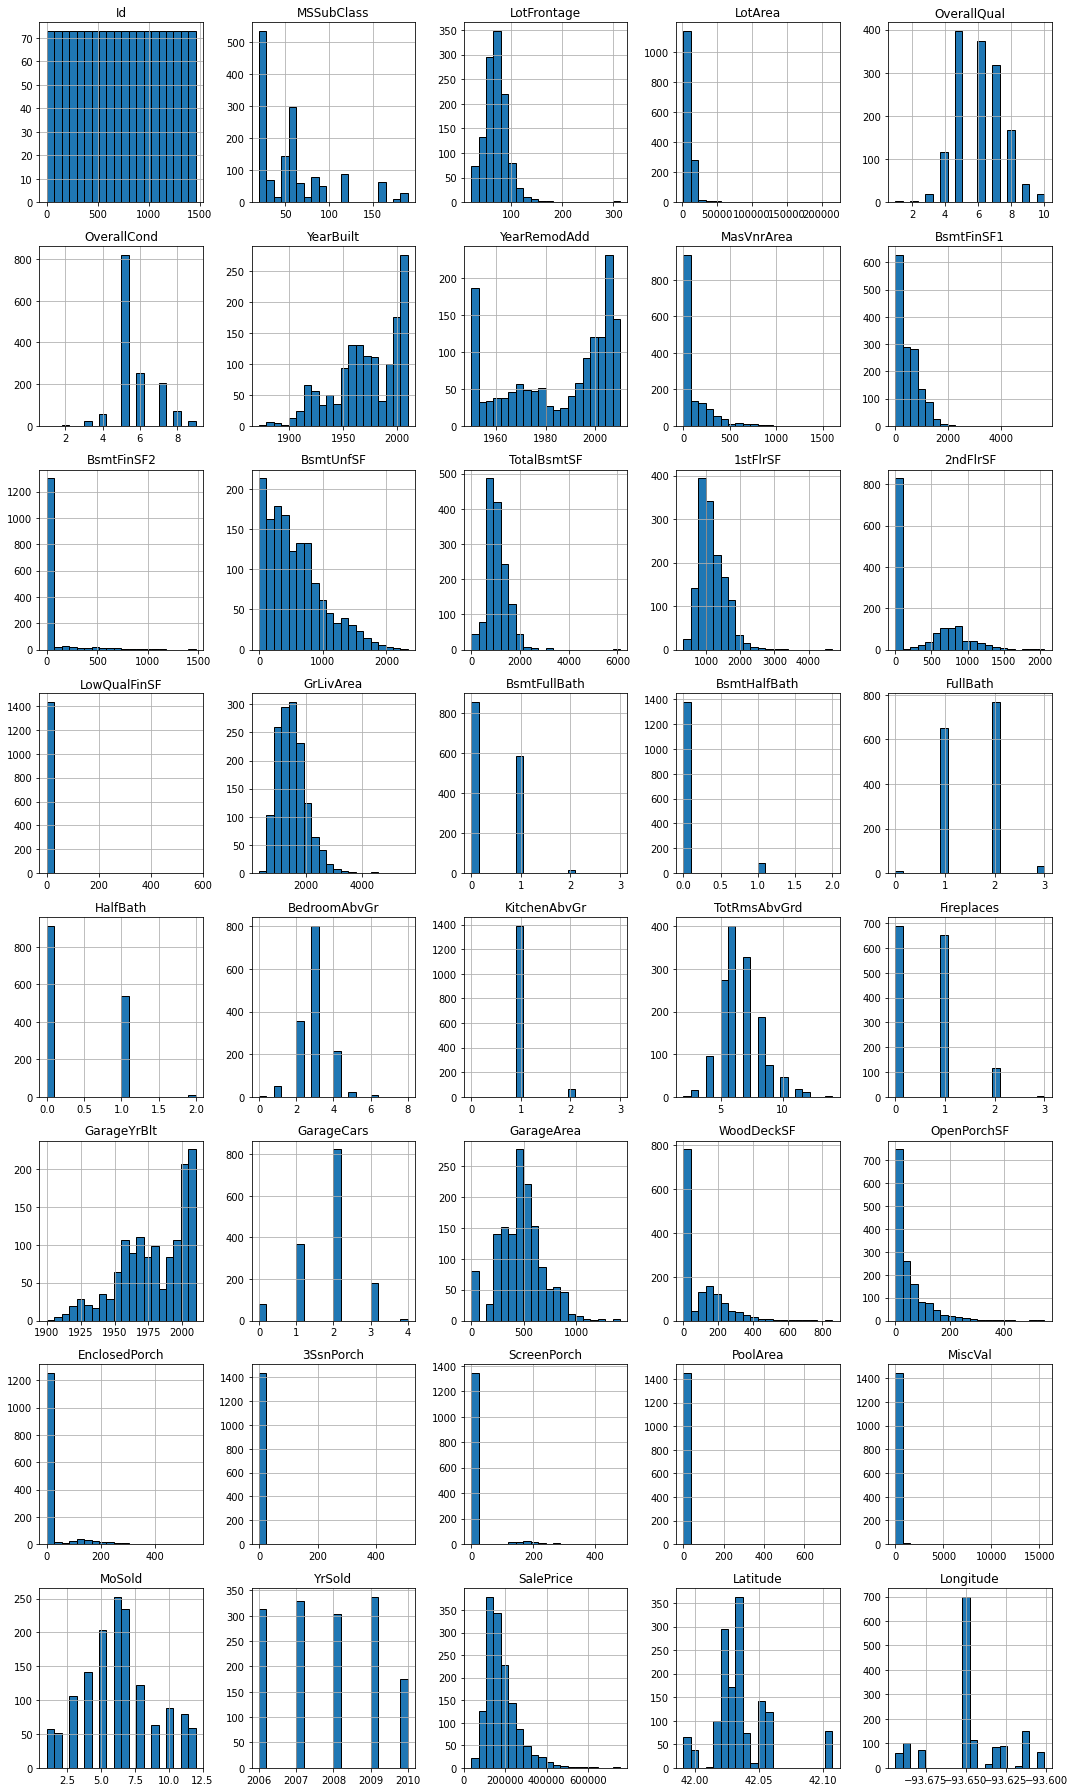

In [14]:
df.hist(bins=20,figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

In [15]:
df['Alley'].replace(np.nan, 'No alley access', inplace=True)
df['BsmtQual'].replace(np.nan,'No Basement', inplace=True)
df['BsmtCond'].replace(np.nan,'No Basement', inplace=True)
df['BsmtExposure'].replace(np.nan,'No Basement', inplace=True)
df['BsmtFinType1'].replace(np.nan,'No Basement', inplace=True)
df['BsmtFinType2'].replace(np.nan,'No Basement', inplace=True)
df['FireplaceQu'].replace(np.nan,'No Fireplace', inplace=True)
df['GarageType'].replace(np.nan,'No Garage', inplace=True)
df['GarageFinish'].replace(np.nan,'No Garage', inplace=True)
df['GarageQual'].replace(np.nan,'No Garage', inplace=True)
df['GarageCond'].replace(np.nan,'No Garage', inplace=True)
df['PoolQC'].replace(np.nan,'No Pool', inplace=True)
df['Fence'].replace(np.nan,'No Fence', inplace=True)
df['MiscFeature'].replace(np.nan,'None', inplace=True)

# df.drop(['Alley','MasVnrType','MasVnrArea',], axis = 1)

In [16]:
mean_value=df['LotFrontage'].mean()
df['LotFrontage'].fillna(value=mean_value, inplace=True)

In [17]:
df.dropna(subset=['MasVnrType'], how='any', axis=0, inplace = True)
df.dropna(subset=['MasVnrArea'], how='any', axis=0, inplace = True)
df.dropna(subset=['GarageYrBlt'], how='any', axis=0, inplace = True)
df.dropna(subset=['Electrical'], how='any', axis=0, inplace = True)

In [18]:
df.shape

(1370, 83)

In [19]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1370.00000  1370.000000  1370.000000    1370.000000  1370.000000   
mean    730.69635    56.054745    70.551452   10687.435036     6.181752   
std     421.19485    41.073531    21.950456   10228.507006     1.344236   
min       1.00000    20.000000    21.000000    1300.000000     2.000000   
25%     365.25000    20.000000    60.000000    7731.000000     5.000000   
50%     732.50000    50.000000    70.049958    9591.000000     6.000000   
75%    1093.75000    70.000000    79.000000   11712.750000     7.000000   
max    1460.00000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1370.000000  1370.000000   1370.000000  1370.000000  1370.000000  ...   
mean      5.582482  1972.783942   1985.327007   109.076642   454.211679  ...   
std       1.081480    29.371056     20.452934   184.589326   458.985739  ...   
min       2.000000  1880.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1955.000000   1967.250000     0.000000     0.000000  ...   
50%       5.000000  1975.000000   1994.000000     0.000000   399.500000  ...   
75%       6.000000  2001.000000   2004.000000   171.750000   728.000000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea       MiscVal  \
count    1370.000000  1370.000000  1370.000000  1370.000000   1370.000000   
mean       21.031387     3.633577    16.050365     2.940146     43.170803   
std        60.519492    30.252215    57.422820    41.470515    503.247977   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     0.000000      0.000000   
50%         0.000000     0.000000     0.000000     0.000000      0.000000   
75%         0.000000     0.000000     0.000000     0.000000      0.000000   
max       552.000000   508.000000   480.000000   738.000000  15500.000000   

            MoSold       YrSold      SalePrice     Latitude    Longitude  
count  1370.000000  1370.000000    1370.000000  1370.000000  1370.000000  
mean      6.331387  2007.811679  185194.797080    42.036302   -93.646210  
std       2.693166     1.331589   78899.705642     0.023391     0.021583  
min       1.000000  2006.000000   35311.000000    41.990946   -93.693795  
25%       5.000000  2007.000000  133925.000000    42.022794   -93.651542  
50%       6.000000  2008.000000  167000.000000    42.035218   -93.647551  
75%       8.000000  2009.000000  217875.000000    42.043478   -93.633349  
max      12.000000  2010.000000  755000.000000    42.106913   -93.601085  

[8 rows x 40 columns]

In [20]:
house_locations = df[["Latitude", "Longitude", "Id"]]

In [21]:
my_map = folium.Map(location=[house_locations.Latitude.mean(), house_locations.Longitude.mean()], zoom_start=14, control_scale=True)

In [22]:
for index, location_info in house_locations.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup=location_info["Id"]).add_to(my_map)

In [23]:
display(my_map)

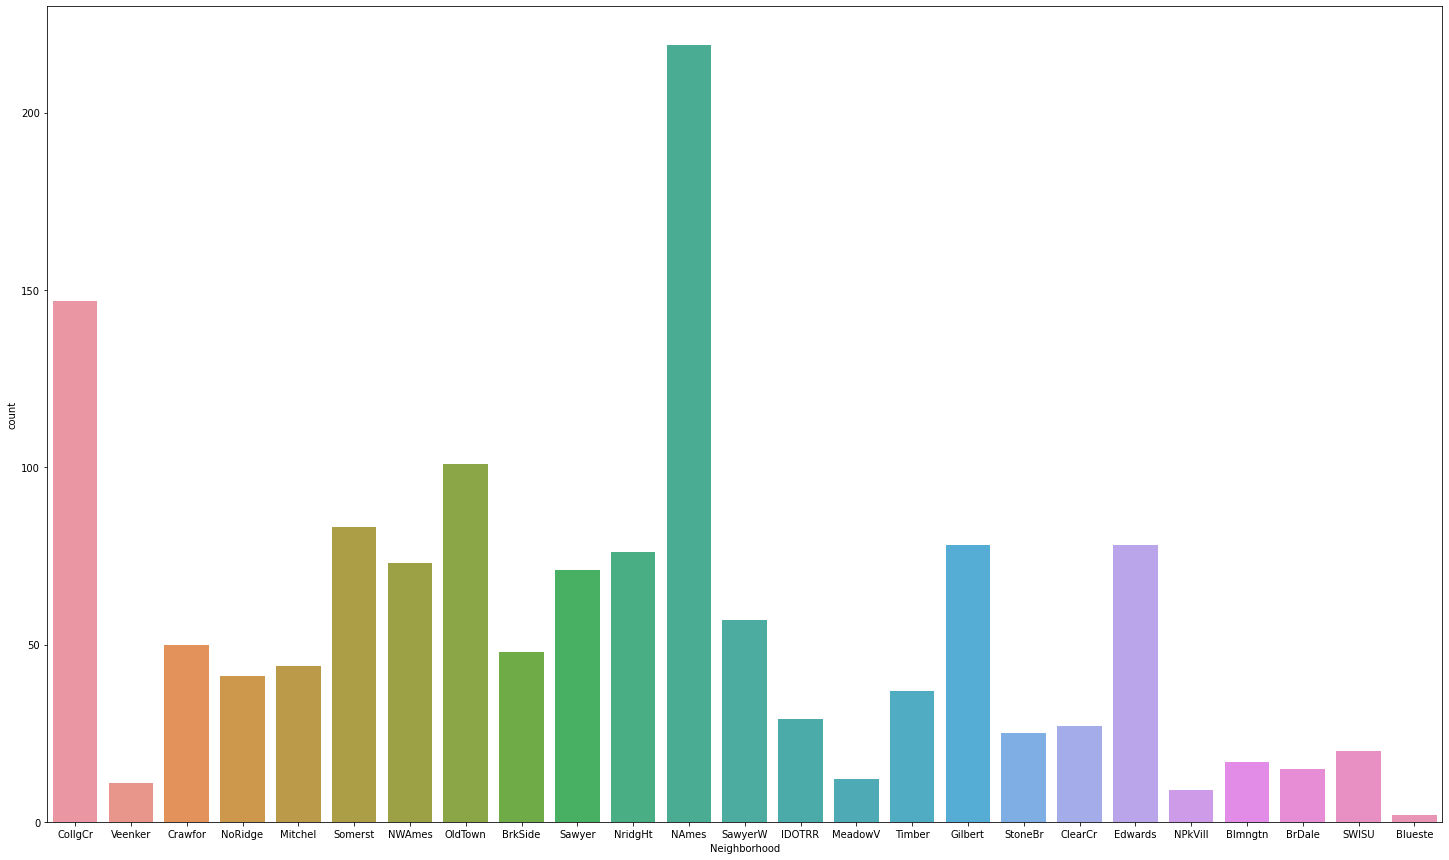

In [24]:
plt.figure(figsize=(25,15))
sns.countplot(x='Neighborhood', data=df)
plt.show()

In [25]:
dict = {'Neighborhood':['Blmngtn','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor','Edwards','Gilbert','IDOTRR','MeadowV','Mitchel','NAmes','NoRidge','NPkVill','NridgHt','NWAmes','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker'],
        'Avg SalePrice':[df.loc[df['Neighborhood'] == 'Blmngtn','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'Blueste','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'BrDale','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'BrkSide','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'ClearCr','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'CollgCr','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'Crawfor','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'Edwards','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'Gilbert','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'IDOTRR','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'MeadowV','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'Mitchel','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'NAmes','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'NoRidge','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'NPkVill','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'NridgHt','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'NWAmes','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'OldTown','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'SWISU','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'Sawyer','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'SawyerW','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'Somerst','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'StoneBr','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'Timber','SalePrice'].mean(),df.loc[df['Neighborhood'] == 'Veenker','SalePrice'].mean()]
       }
  
df2 = pd.DataFrame(dict)
df2

dict2 = {'Neighborhood':['Blmngtn','Blueste','BrDale','BrkSide','ClearCr','CollgCr','Crawfor','Edwards','Gilbert','IDOTRR','MeadowV','Mitchel','NAmes','NoRidge','NPkVill','NridgHt','NWAmes','OldTown','SWISU','Sawyer','SawyerW','Somerst','StoneBr','Timber','Veenker'],
         'Latitude': [42.056593831096365,42.00958101697704,42.05297820753384,42.02880449929659,42.03657397883218,42.02279411036844,42.02116250946755,42.01566960171523,42.10691318337364,42.03666810377849,41.99264834319078,41.99094631946181,42.035217770905255,42.053653373719825,42.02505591810293,42.059956387401236,42.03843654463088,42.02927709250526,42.02385001914031,42.03434893209798,42.0230605002559,42.05282526249589,42.05942644487233,42.000132640657014,42.04347796867545],
         'Longitude':[-93.63524713132111,-93.64663684481653,-93.62882100248581,-93.63040696015759,-93.64900179963674,-93.65154241331666,-93.6489680624659,-93.68590558658853,-93.64985805420264,-93.61135345555746,-93.6026366898297,-93.60108548899446,-93.64755130248649,-93.64860381597944,-93.61899657365139,-93.64950348899191,-93.62574884481545,-93.61434010248672,-93.6456436394206,-93.6770658024865,-93.693795409969,-93.64514357577995,-93.63334903356377,-93.6497354178296,-93.65069642276987]
       }
  
df3 = pd.DataFrame(dict2)
df3

Neighborhood   Latitude  Longitude
0       Blmngtn  42.056594 -93.635247
1       Blueste  42.009581 -93.646637
2        BrDale  42.052978 -93.628821
3       BrkSide  42.028804 -93.630407
4       ClearCr  42.036574 -93.649002
5       CollgCr  42.022794 -93.651542
6       Crawfor  42.021163 -93.648968
7       Edwards  42.015670 -93.685906
8       Gilbert  42.106913 -93.649858
9        IDOTRR  42.036668 -93.611353
10      MeadowV  41.992648 -93.602637
11      Mitchel  41.990946 -93.601085
12        NAmes  42.035218 -93.647551
13      NoRidge  42.053653 -93.648604
14      NPkVill  42.025056 -93.618997
15      NridgHt  42.059956 -93.649503
16       NWAmes  42.038437 -93.625749
17      OldTown  42.029277 -93.614340
18        SWISU  42.023850 -93.645644
19       Sawyer  42.034349 -93.677066
20      SawyerW  42.023061 -93.693795
21      Somerst  42.052825 -93.645144
22      StoneBr  42.059426 -93.633349
23       Timber  42.000133 -93.649735
24      Veenker  42.043478 -93.650696

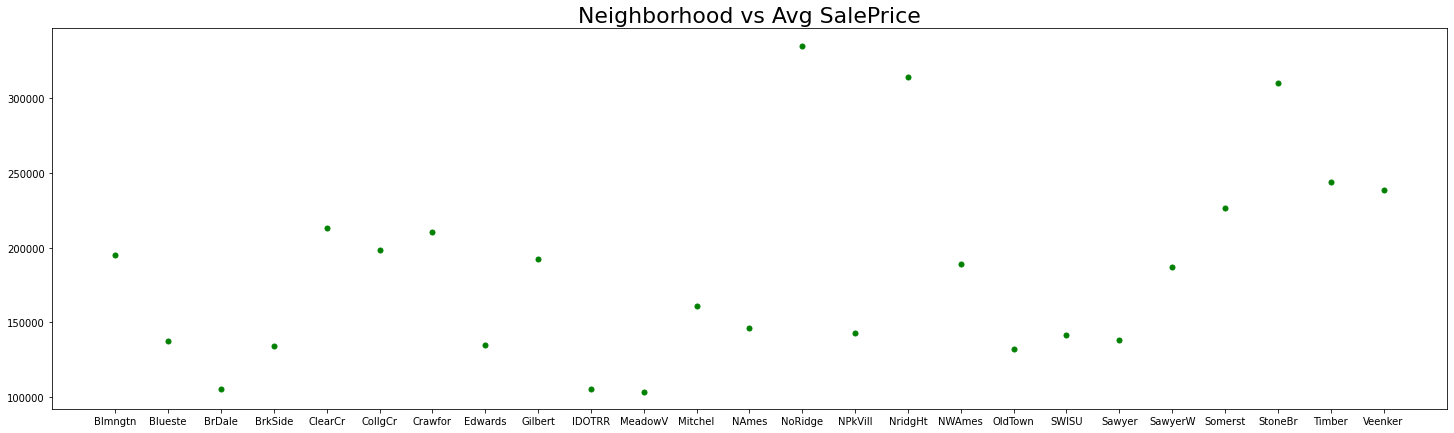

In [26]:
plt.figure(figsize=(25,7))
plt.scatter(df2['Neighborhood'],df2['Avg SalePrice'],s=25,c='g')
plt.title("Neighborhood vs Avg SalePrice", fontsize=22)
plt.show()

<AxesSubplot:xlabel='Neighborhood'>

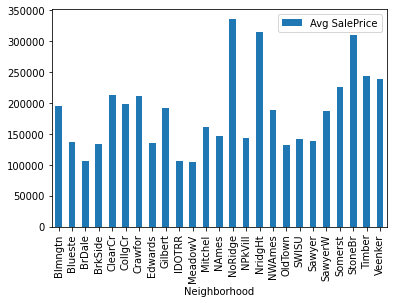

In [27]:
df2.plot(kind='bar',x='Neighborhood',y='Avg SalePrice')

In [28]:
df2.nlargest(5,'Avg SalePrice')

Neighborhood  Avg SalePrice
13      NoRidge  335295.317073
15      NridgHt  314313.657895
22      StoneBr  310499.000000
23       Timber  244267.648649
24      Veenker  238772.727273

In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df2
df2['Neighborhood'] = labelencoder.fit_transform(df2['Neighborhood'])
df2

Neighborhood  Avg SalePrice
0              0  194870.882353
1              1  137500.000000
2              2  105360.000000
3              3  134126.562500
4              4  213012.296296
5              5  198709.292517
6              6  210824.740000
7              7  134758.589744
8              8  192551.358974
9              9  105471.724138
10            10  103816.666667
11            11  160937.181818
12            12  146445.858447
13            15  335295.317073
14            13  142694.444444
15            16  314313.657895
16            14  189050.068493
17            17  132165.435644
18            18  141844.200000
19            19  138199.887324
20            20  187384.070175
21            21  226443.566265
22            22  310499.000000
23            23  244267.648649
24            24  238772.727273

In [30]:
labelencoder = LabelEncoder()
df3
df3['Neighborhood'] = labelencoder.fit_transform(df3['Neighborhood'])
df3

Neighborhood   Latitude  Longitude
0              0  42.056594 -93.635247
1              1  42.009581 -93.646637
2              2  42.052978 -93.628821
3              3  42.028804 -93.630407
4              4  42.036574 -93.649002
5              5  42.022794 -93.651542
6              6  42.021163 -93.648968
7              7  42.015670 -93.685906
8              8  42.106913 -93.649858
9              9  42.036668 -93.611353
10            10  41.992648 -93.602637
11            11  41.990946 -93.601085
12            12  42.035218 -93.647551
13            15  42.053653 -93.648604
14            13  42.025056 -93.618997
15            16  42.059956 -93.649503
16            14  42.038437 -93.625749
17            17  42.029277 -93.614340
18            18  42.023850 -93.645644
19            19  42.034349 -93.677066
20            20  42.023061 -93.693795
21            21  42.052825 -93.645144
22            22  42.059426 -93.633349
23            23  42.000133 -93.649735
24            24  42.043478 -93.650696

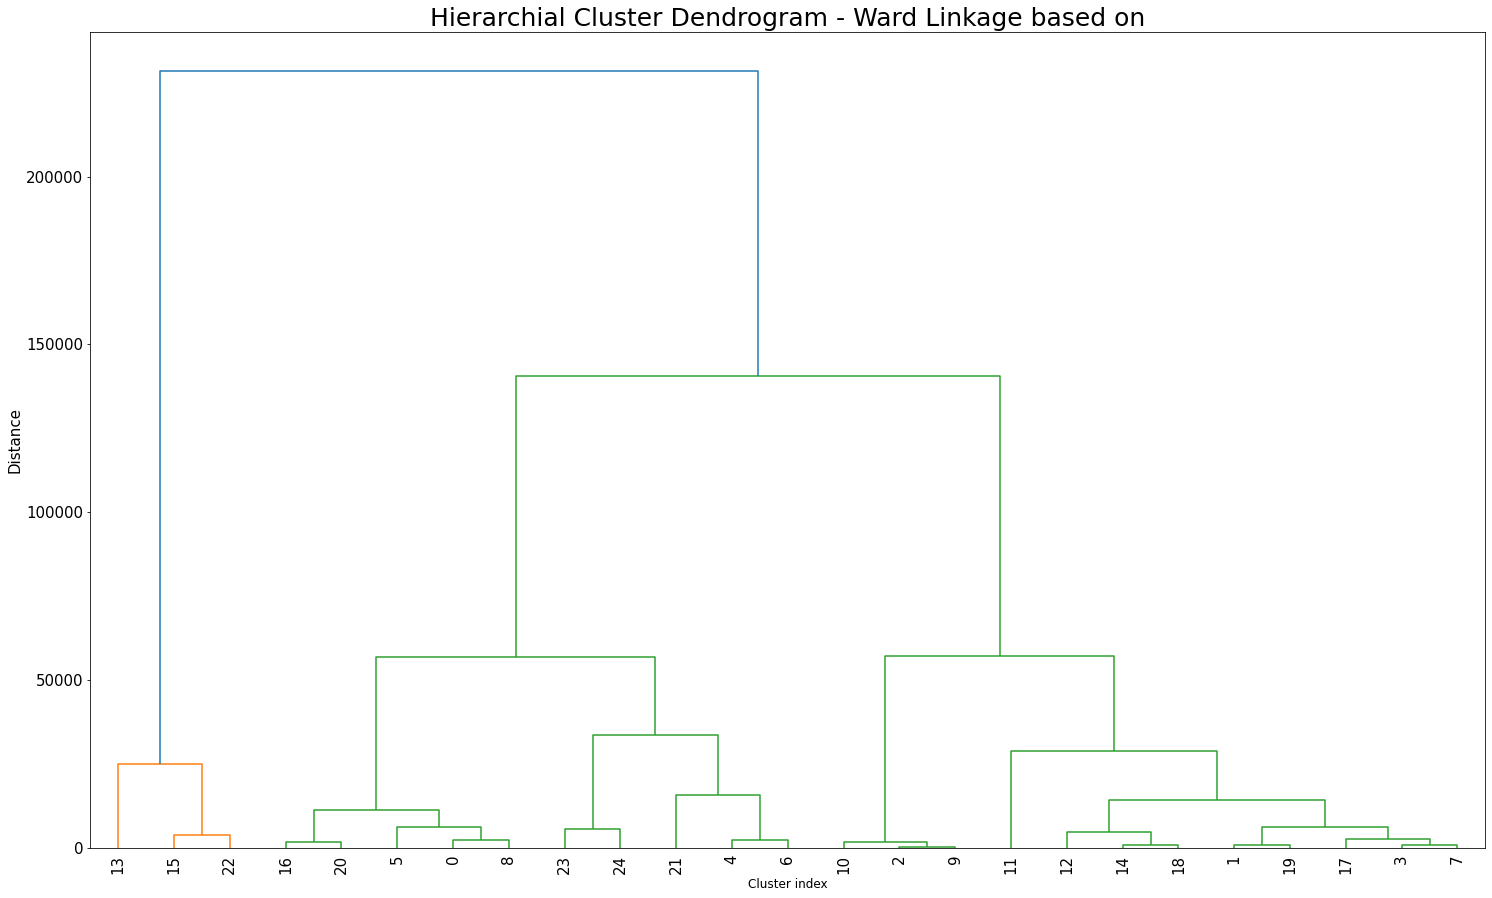

In [31]:
#DF2
from scipy.cluster.hierarchy import linkage
returns_complete = linkage(df2, method='complete', metric = 'euclidean')
from scipy.cluster.hierarchy import dendrogram


plt.figure(figsize=(25, 15))
plt.title('Hierarchial Cluster Dendrogram - Ward Linkage based on',fontsize = 25)
plt.xlabel('Cluster index',fontsize = 12)
plt.ylabel('Distance',fontsize = 15)
plt.yticks(fontsize = 15)

dendrogram(returns_complete, 
            truncate_mode= 'lastp',
            p = 100, 
            leaf_rotation=90, 
            leaf_font_size=15,
            show_leaf_counts = True) 

plt.show()

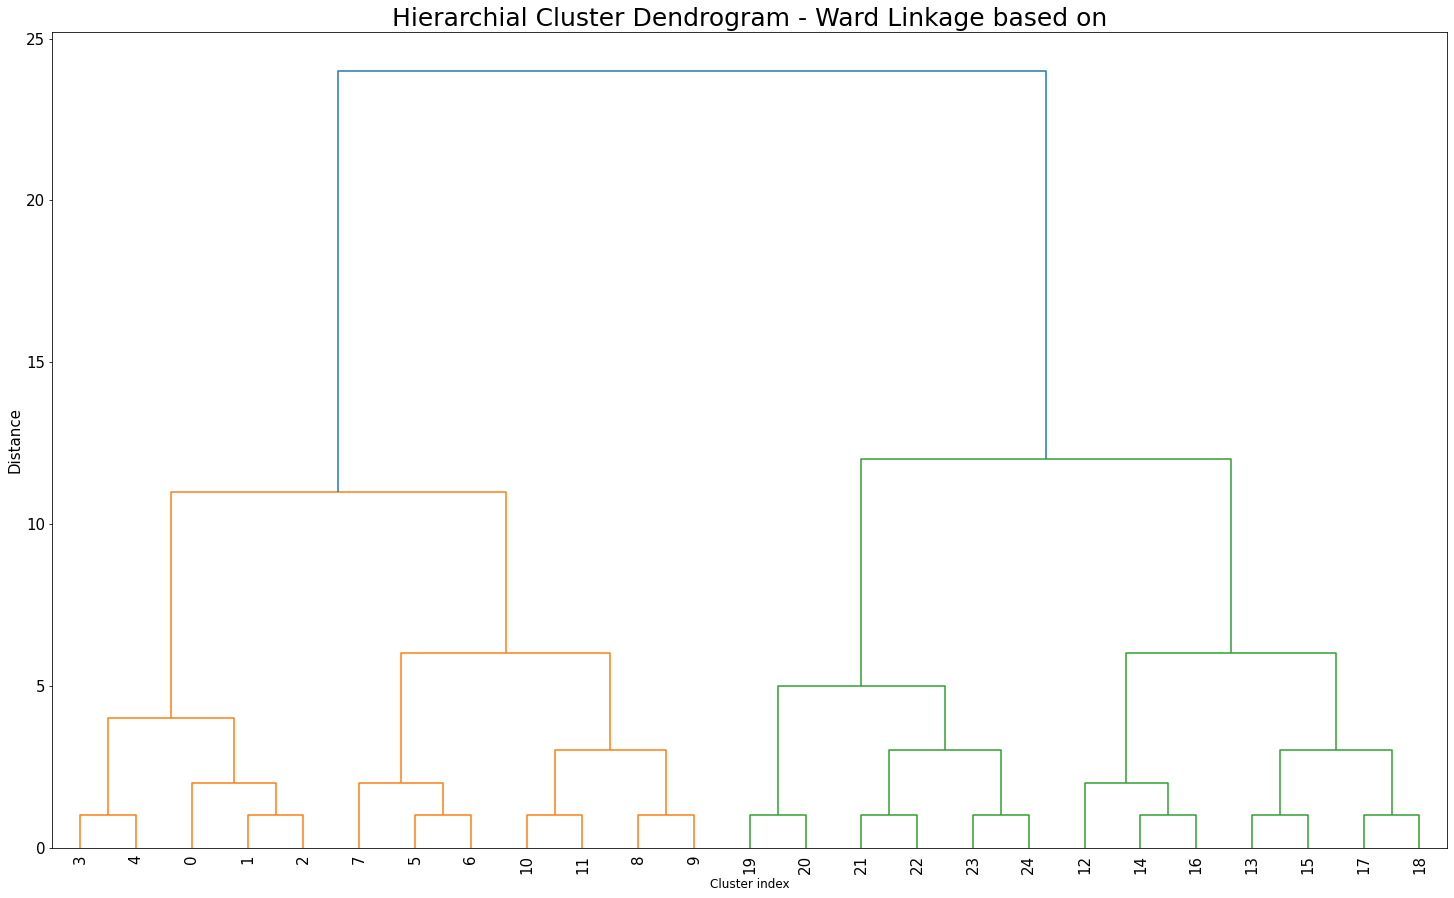

In [32]:
from scipy.cluster.hierarchy import linkage
returns_complete = linkage(df3, method='complete', metric = 'euclidean')
from scipy.cluster.hierarchy import dendrogram


plt.figure(figsize=(25, 15))
plt.title('Hierarchial Cluster Dendrogram - Ward Linkage based on',fontsize = 25)
plt.xlabel('Cluster index',fontsize = 12)
plt.ylabel('Distance',fontsize = 15)
plt.yticks(fontsize = 15)

dendrogram(returns_complete, 
            truncate_mode= 'lastp',
            p = 100, 
            leaf_rotation=90, 
            leaf_font_size=15,
            show_leaf_counts = True) 

plt.show()

In [33]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
0        1          60       RL         65.0     8450   Pave  No alley access   
1        2          20       RL         80.0     9600   Pave  No alley access   
2        3          60       RL         68.0    11250   Pave  No alley access   
3        4          70       RL         60.0     9550   Pave  No alley access   
4        5          60       RL         84.0    14260   Pave  No alley access   
...    ...         ...      ...          ...      ...    ...              ...   
1455  1456          60       RL         62.0     7917   Pave  No alley access   
1456  1457          20       RL         85.0    13175   Pave  No alley access   
1457  1458          70       RL         66.0     9042   Pave  No alley access   
1458  1459          20       RL         68.0     9717   Pave  No alley access   
1459  1460          20       RL         75.0     9937   Pave  No alley access   

     LotShape LandContour Utilities  ...     Fence MiscFeature MiscVal MoSold  \
0         Reg         Lvl    AllPub  ...  No Fence        None       0      2   
1         Reg         Lvl    AllPub  ...  No Fence        None       0      5   
2         IR1         Lvl    AllPub  ...  No Fence        None       0      9   
3         IR1         Lvl    AllPub  ...  No Fence        None       0      2   
4         IR1         Lvl    AllPub  ...  No Fence        None       0     12   
...       ...         ...       ...  ...       ...         ...     ...    ...   
1455      Reg         Lvl    AllPub  ...  No Fence        None       0      8   
1456      Reg         Lvl    AllPub  ...     MnPrv        None       0      2   
1457      Reg         Lvl    AllPub  ...     GdPrv        Shed    2500      5   
1458      Reg         Lvl    AllPub  ...  No Fence        None       0      4   
1459      Reg         Lvl    AllPub  ...  No Fence        None       0      6   

     YrSold SaleType SaleCondition  SalePrice   Latitude  Longitude  
0      2008       WD        Normal     208500  42.022794 -93.651542  
1      2007       WD        Normal     181500  42.043478 -93.650696  
2      2008       WD        Normal     223500  42.022794 -93.651542  
3      2006       WD       Abnorml     140000  42.021163 -93.648968  
4      2008       WD        Normal     250000  42.053653 -93.648604  
...     ...      ...           ...        ...        ...        ...  
1455   2007       WD        Normal     175000  42.106913 -93.649858  
1456   2010       WD        Normal     210000  42.038437 -93.625749  
1457   2010       WD        Normal     266500  42.021163 -93.648968  
1458   2010       WD        Normal     142125  42.035218 -93.647551  
1459   2008       WD        Normal     147500  42.015670 -93.685906  

[1370 rows x 83 columns]

In [34]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [35]:
df = df.drop(['Latitude','Longitude','Id'], axis = 1)

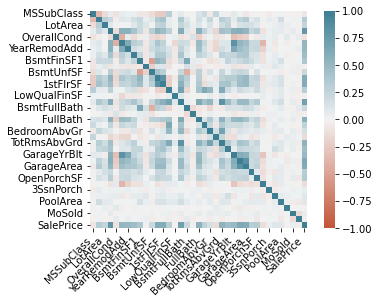

In [36]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

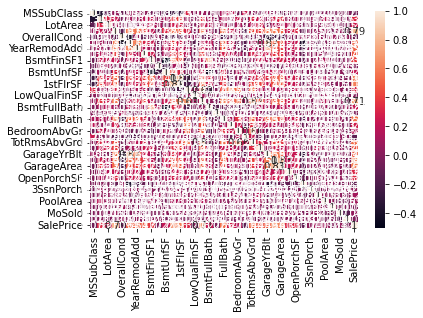

In [37]:
 #plotting the heatmap for correlation
ax = sns.heatmap(df.corr(), annot=True)

In [38]:
df

MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
0             60       RL         65.0     8450   Pave  No alley access   
1             20       RL         80.0     9600   Pave  No alley access   
2             60       RL         68.0    11250   Pave  No alley access   
3             70       RL         60.0     9550   Pave  No alley access   
4             60       RL         84.0    14260   Pave  No alley access   
...          ...      ...          ...      ...    ...              ...   
1455          60       RL         62.0     7917   Pave  No alley access   
1456          20       RL         85.0    13175   Pave  No alley access   
1457          70       RL         66.0     9042   Pave  No alley access   
1458          20       RL         68.0     9717   Pave  No alley access   
1459          20       RL         75.0     9937   Pave  No alley access   

     LotShape LandContour Utilities LotConfig  ... PoolArea   PoolQC  \
0         Reg         Lvl    AllPub    Inside  ...        0  No Pool   
1         Reg         Lvl    AllPub       FR2  ...        0  No Pool   
2         IR1         Lvl    AllPub    Inside  ...        0  No Pool   
3         IR1         Lvl    AllPub    Corner  ...        0  No Pool   
4         IR1         Lvl    AllPub       FR2  ...        0  No Pool   
...       ...         ...       ...       ...  ...      ...      ...   
1455      Reg         Lvl    AllPub    Inside  ...        0  No Pool   
1456      Reg         Lvl    AllPub    Inside  ...        0  No Pool   
1457      Reg         Lvl    AllPub    Inside  ...        0  No Pool   
1458      Reg         Lvl    AllPub    Inside  ...        0  No Pool   
1459      Reg         Lvl    AllPub    Inside  ...        0  No Pool   

         Fence MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  \
0     No Fence        None       0      2    2008        WD         Normal   
1     No Fence        None       0      5    2007        WD         Normal   
2     No Fence        None       0      9    2008        WD         Normal   
3     No Fence        None       0      2    2006        WD        Abnorml   
4     No Fence        None       0     12    2008        WD         Normal   
...        ...         ...     ...    ...     ...       ...            ...   
1455  No Fence        None       0      8    2007        WD         Normal   
1456     MnPrv        None       0      2    2010        WD         Normal   
1457     GdPrv        Shed    2500      5    2010        WD         Normal   
1458  No Fence        None       0      4    2010        WD         Normal   
1459  No Fence        None       0      6    2008        WD         Normal   

      SalePrice  
0        208500  
1        181500  
2        223500  
3        140000  
4        250000  
...         ...  
1455     175000  
1456     210000  
1457     266500  
1458     142125  
1459     147500  

[1370 rows x 80 columns]

In [39]:
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice.head(15))

SalePrice       1.000000
OverallQual     0.786304
GrLivArea       0.709783
GarageCars      0.636173
GarageArea      0.607197
TotalBsmtSF     0.603284
1stFlrSF        0.596087
FullBath        0.558902
TotRmsAbvGrd    0.541189
YearBuilt       0.508127
YearRemodAdd    0.506063
GarageYrBlt     0.486658
MasVnrArea      0.468055
Fireplaces      0.450948
BsmtFinSF1      0.373057
Name: SalePrice, dtype: float64


In [40]:
df[['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']]=df[['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']].astype('category')


In [41]:
df_new = df

In [43]:
df_new

MSSubClass MSZoning  LotFrontage  LotArea Street            Alley  \
0             60       RL         65.0     8450   Pave  No alley access   
1             20       RL         80.0     9600   Pave  No alley access   
2             60       RL         68.0    11250   Pave  No alley access   
3             70       RL         60.0     9550   Pave  No alley access   
4             60       RL         84.0    14260   Pave  No alley access   
...          ...      ...          ...      ...    ...              ...   
1455          60       RL         62.0     7917   Pave  No alley access   
1456          20       RL         85.0    13175   Pave  No alley access   
1457          70       RL         66.0     9042   Pave  No alley access   
1458          20       RL         68.0     9717   Pave  No alley access   
1459          20       RL         75.0     9937   Pave  No alley access   

     LotShape LandContour Utilities LotConfig  ... PoolArea   PoolQC  \
0         Reg         Lvl    AllPub    Inside  ...        0  No Pool   
1         Reg         Lvl    AllPub       FR2  ...        0  No Pool   
2         IR1         Lvl    AllPub    Inside  ...        0  No Pool   
3         IR1         Lvl    AllPub    Corner  ...        0  No Pool   
4         IR1         Lvl    AllPub       FR2  ...        0  No Pool   
...       ...         ...       ...       ...  ...      ...      ...   
1455      Reg         Lvl    AllPub    Inside  ...        0  No Pool   
1456      Reg         Lvl    AllPub    Inside  ...        0  No Pool   
1457      Reg         Lvl    AllPub    Inside  ...        0  No Pool   
1458      Reg         Lvl    AllPub    Inside  ...        0  No Pool   
1459      Reg         Lvl    AllPub    Inside  ...        0  No Pool   

         Fence MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  \
0     No Fence        None       0      2    2008        WD         Normal   
1     No Fence        None       0      5    2007        WD         Normal   
2     No Fence        None       0      9    2008        WD         Normal   
3     No Fence        None       0      2    2006        WD        Abnorml   
4     No Fence        None       0     12    2008        WD         Normal   
...        ...         ...     ...    ...     ...       ...            ...   
1455  No Fence        None       0      8    2007        WD         Normal   
1456     MnPrv        None       0      2    2010        WD         Normal   
1457     GdPrv        Shed    2500      5    2010        WD         Normal   
1458  No Fence        None       0      4    2010        WD         Normal   
1459  No Fence        None       0      6    2008        WD         Normal   

      SalePrice  
0        208500  
1        181500  
2        223500  
3        140000  
4        250000  
...         ...  
1455     175000  
1456     210000  
1457     266500  
1458     142125  
1459     147500  

[1370 rows x 80 columns]

In [44]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df['MSZoning'] = labelencoder.fit_transform(df['MSZoning'])
df['Street'] = labelencoder.fit_transform(df['Street'])
df['Alley'] = labelencoder.fit_transform(df['Alley'])
df['LotShape'] = labelencoder.fit_transform(df['LotShape'])
df['LandContour'] = labelencoder.fit_transform(df['LandContour'])
df['Utilities'] = labelencoder.fit_transform(df['Utilities'])   
df['LotConfig'] = labelencoder.fit_transform(df['LotConfig'])   
df['LandSlope'] = labelencoder.fit_transform(df['LandSlope'])    
df['Neighborhood'] = labelencoder.fit_transform(df['Neighborhood'])
df['Condition1'] = labelencoder.fit_transform(df['Condition1'])  
df['Condition2'] = labelencoder.fit_transform(df['Condition2']) 
df['BldgType'] = labelencoder.fit_transform(df['BldgType'])    
df['HouseStyle'] = labelencoder.fit_transform(df['HouseStyle'])  
df['RoofStyle'] = labelencoder.fit_transform(df['RoofStyle'])   
df['RoofMatl'] = labelencoder.fit_transform(df['RoofMatl'])    
df['Exterior1st'] = labelencoder.fit_transform(df['Exterior1st']) 
df['Exterior2nd'] = labelencoder.fit_transform(df['Exterior2nd']) 
df['MasVnrType'] = labelencoder.fit_transform(df['MasVnrType'])  
df['ExterQual'] = labelencoder.fit_transform(df['ExterQual'])   
df['ExterCond'] = labelencoder.fit_transform(df['ExterCond'])   
df['Foundation'] = labelencoder.fit_transform(df['Foundation'])  
df['BsmtQual'] = labelencoder.fit_transform(df['BsmtQual'])    
df['BsmtCond'] = labelencoder.fit_transform(df['BsmtCond'])    
df['BsmtExposure'] = labelencoder.fit_transform(df['BsmtExposure'])
df['BsmtFinType1'] = labelencoder.fit_transform(df['BsmtFinType1'])
df['BsmtFinType2'] = labelencoder.fit_transform(df['BsmtFinType2'])
df['Heating'] = labelencoder.fit_transform(df['Heating'])   
df['HeatingQC'] = labelencoder.fit_transform(df['HeatingQC']) 
df['Electrical'] = labelencoder.fit_transform(df['Electrical'])
df['KitchenQual'] = labelencoder.fit_transform(df['KitchenQual'])
df['Functional'] = labelencoder.fit_transform(df['Functional']) 
df['FireplaceQu'] = labelencoder.fit_transform(df['FireplaceQu']) 
df['GarageType'] = labelencoder.fit_transform(df['GarageType'])
df['GarageFinish'] = labelencoder.fit_transform(df['GarageFinish'])
df['GarageQual'] = labelencoder.fit_transform(df['GarageQual'])
df['GarageCond'] = labelencoder.fit_transform(df['GarageCond'])
df['PavedDrive'] = labelencoder.fit_transform(df['PavedDrive'])
df['PoolQC'] = labelencoder.fit_transform(df['PoolQC'])
df['Fence'] = labelencoder.fit_transform(df['Fence']) 
df['MiscFeature'] = labelencoder.fit_transform(df['MiscFeature'])
df['SaleType'] = labelencoder.fit_transform(df['SaleType'])
df['SaleCondition']= labelencoder.fit_transform(df['SaleCondition'])
df['CentralAir']= labelencoder.fit_transform(df['CentralAir'])



In [45]:
df

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0             60         3         65.0     8450       1      1         3   
1             20         3         80.0     9600       1      1         3   
2             60         3         68.0    11250       1      1         0   
3             70         3         60.0     9550       1      1         0   
4             60         3         84.0    14260       1      1         0   
...          ...       ...          ...      ...     ...    ...       ...   
1455          60         3         62.0     7917       1      1         3   
1456          20         3         85.0    13175       1      1         3   
1457          70         3         66.0     9042       1      1         3   
1458          20         3         68.0     9717       1      1         3   
1459          20         3         75.0     9937       1      1         3   

      LandContour  Utilities  LotConfig  ...  PoolArea  PoolQC  Fence  \
0               3          0          4  ...         0       3      4   
1               3          0          2  ...         0       3      4   
2               3          0          4  ...         0       3      4   
3               3          0          0  ...         0       3      4   
4               3          0          2  ...         0       3      4   
...           ...        ...        ...  ...       ...     ...    ...   
1455            3          0          4  ...         0       3      4   
1456            3          0          4  ...         0       3      2   
1457            3          0          4  ...         0       3      0   
1458            3          0          4  ...         0       3      4   
1459            3          0          4  ...         0       3      4   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0               1        0       2    2008         8              4     208500  
1               1        0       5    2007         8              4     181500  
2               1        0       9    2008         8              4     223500  
3               1        0       2    2006         8              0     140000  
4               1        0      12    2008         8              4     250000  
...           ...      ...     ...     ...       ...            ...        ...  
1455            1        0       8    2007         8              4     175000  
1456            1        0       2    2010         8              4     210000  
1457            3     2500       5    2010         8              4     266500  
1458            1        0       4    2010         8              4     142125  
1459            1        0       6    2008         8              4     147500  

[1370 rows x 80 columns]

In [46]:
df = df.drop(['GarageYrBlt','TotalBsmtSF','TotRmsAbvGrd','GarageArea'], axis = 1)
# Correlations from the matrix threshold >0.7
# Year built - Garage built
# 1stFlrSF - TotalBsmtSF
# TotRmsAbvGrd - GrLivArea
# GarageCars - GarageArea
# SalePrice - OverallQual
# GrLivArea - SalePrice

In [47]:
df

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0             60         3         65.0     8450       1      1         3   
1             20         3         80.0     9600       1      1         3   
2             60         3         68.0    11250       1      1         0   
3             70         3         60.0     9550       1      1         0   
4             60         3         84.0    14260       1      1         0   
...          ...       ...          ...      ...     ...    ...       ...   
1455          60         3         62.0     7917       1      1         3   
1456          20         3         85.0    13175       1      1         3   
1457          70         3         66.0     9042       1      1         3   
1458          20         3         68.0     9717       1      1         3   
1459          20         3         75.0     9937       1      1         3   

      LandContour  Utilities  LotConfig  ...  PoolArea  PoolQC  Fence  \
0               3          0          4  ...         0       3      4   
1               3          0          2  ...         0       3      4   
2               3          0          4  ...         0       3      4   
3               3          0          0  ...         0       3      4   
4               3          0          2  ...         0       3      4   
...           ...        ...        ...  ...       ...     ...    ...   
1455            3          0          4  ...         0       3      4   
1456            3          0          4  ...         0       3      2   
1457            3          0          4  ...         0       3      0   
1458            3          0          4  ...         0       3      4   
1459            3          0          4  ...         0       3      4   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0               1        0       2    2008         8              4     208500  
1               1        0       5    2007         8              4     181500  
2               1        0       9    2008         8              4     223500  
3               1        0       2    2006         8              0     140000  
4               1        0      12    2008         8              4     250000  
...           ...      ...     ...     ...       ...            ...        ...  
1455            1        0       8    2007         8              4     175000  
1456            1        0       2    2010         8              4     210000  
1457            3     2500       5    2010         8              4     266500  
1458            1        0       4    2010         8              4     142125  
1459            1        0       6    2008         8              4     147500  

[1370 rows x 76 columns]

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

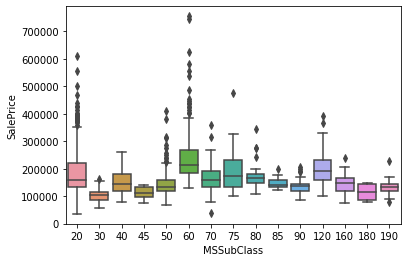

In [48]:
sns.boxplot(x="MSSubClass", y='SalePrice', data= df) 

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

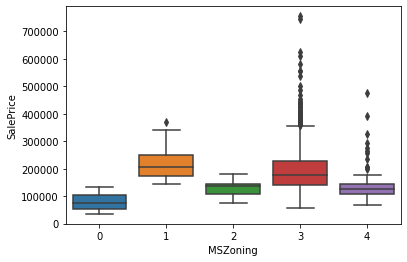

In [49]:
sns.boxplot(x="MSZoning", y='SalePrice', data= df)

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

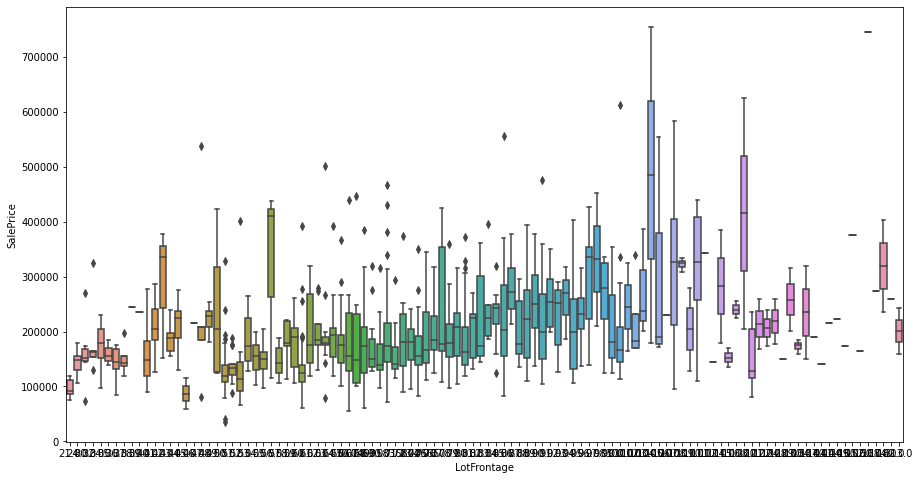

In [50]:
plt.figure(figsize=(15,8))
sns.boxplot(x="LotFrontage", y='SalePrice', data= df) 

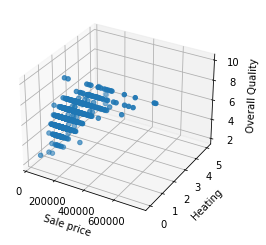

<Figure size 1800x576 with 0 Axes>

In [51]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
plt.figure(figsize=(25,8))
ax = fig.add_subplot(111, projection = '3d')

x = df['SalePrice']
y = df['Heating']

# y = df['CentralAir']
z = df['OverallQual']

ax.scatter(x, y, z)
ax.set_xlabel("Sale price")
ax.set_ylabel("Heating")
ax.set_zlabel("Overall Quality")

plt.show()

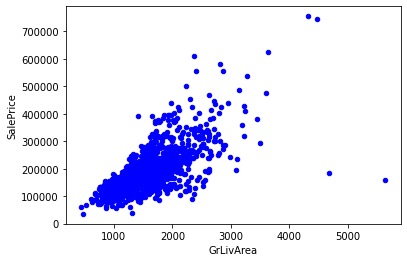

In [52]:
# plt.scatter(df['GrLivArea'], df['SalePrice'])
df.plot(kind='scatter',x='GrLivArea',y='SalePrice',color='BLUE')
plt.show()

Text(0.5, 1.0, 'Month Sold')

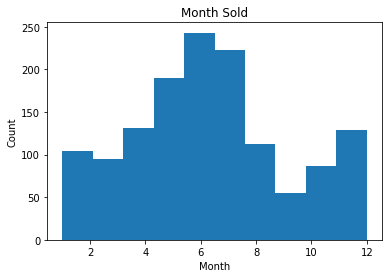

In [53]:
plt.hist(df['MoSold'])
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Month Sold")

<AxesSubplot:xlabel='Alley', ylabel='SalePrice'>

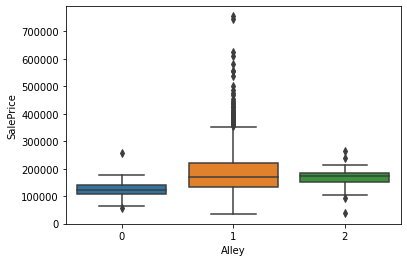

In [54]:
sns.boxplot(x="Alley", y='SalePrice', data= df) 

<AxesSubplot:xlabel='LotShape', ylabel='SalePrice'>

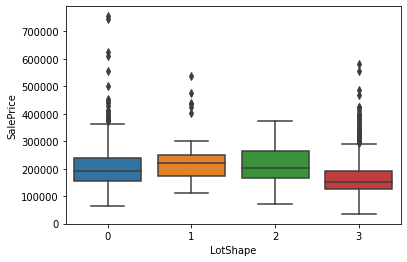

In [55]:
sns.boxplot(x="LotShape", y='SalePrice', data= df) 

<AxesSubplot:xlabel='LandContour', ylabel='SalePrice'>

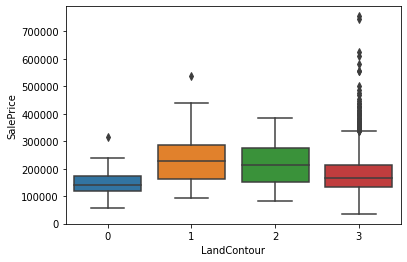

In [56]:
sns.boxplot(x="LandContour", y='SalePrice', data= df) 

<AxesSubplot:xlabel='Utilities', ylabel='SalePrice'>

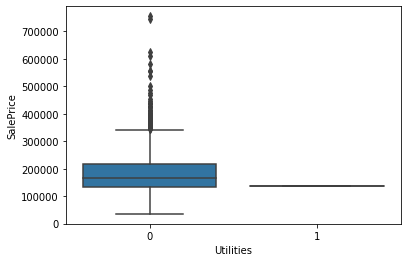

In [57]:
sns.boxplot(x="Utilities", y='SalePrice', data= df) 

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

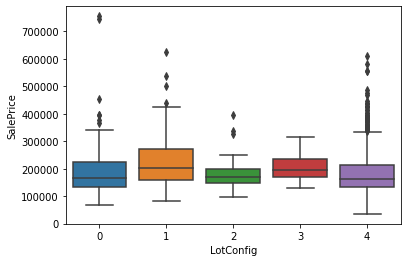

In [58]:
sns.boxplot(x="LotConfig", y='SalePrice', data= df) 

<AxesSubplot:xlabel='LandSlope', ylabel='SalePrice'>

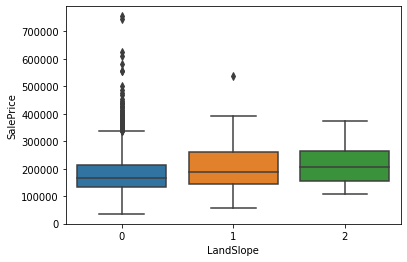

In [59]:
sns.boxplot(x="LandSlope", y='SalePrice', data= df) 

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

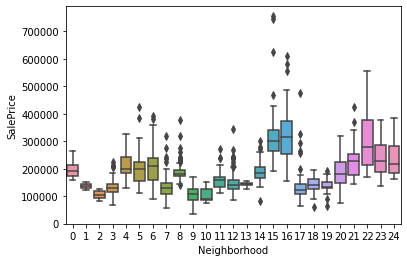

In [60]:
sns.boxplot(x="Neighborhood", y='SalePrice', data= df) 

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

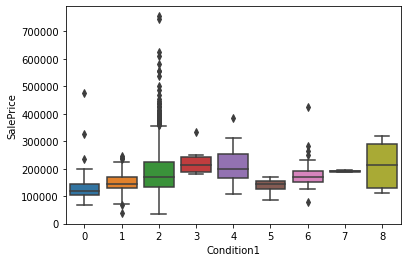

In [61]:
sns.boxplot(x="Condition1", y='SalePrice', data= df) 

<AxesSubplot:xlabel='Condition2', ylabel='SalePrice'>

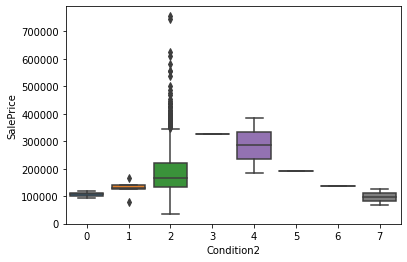

In [62]:
sns.boxplot(x="Condition2", y='SalePrice', data= df) 

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

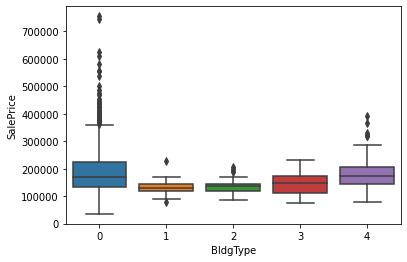

In [63]:
sns.boxplot(x="BldgType", y='SalePrice', data= df) 

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

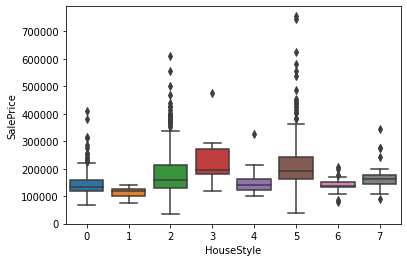

In [64]:
sns.boxplot(x="HouseStyle", y='SalePrice', data= df) 

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

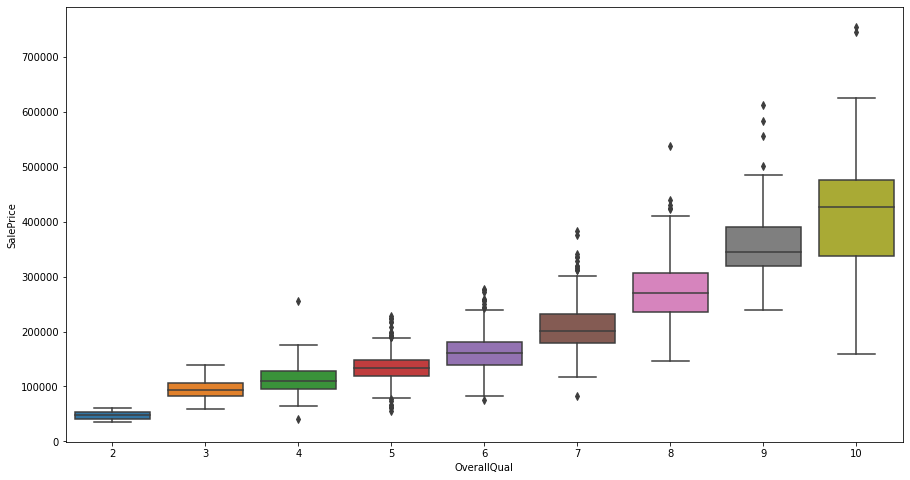

In [65]:
plt.figure(figsize=(15,8))
sns.boxplot(x="OverallQual", y='SalePrice', data= df) 

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

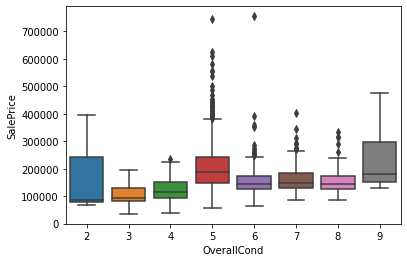

In [66]:
sns.boxplot(x="OverallCond", y='SalePrice', data= df) 

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

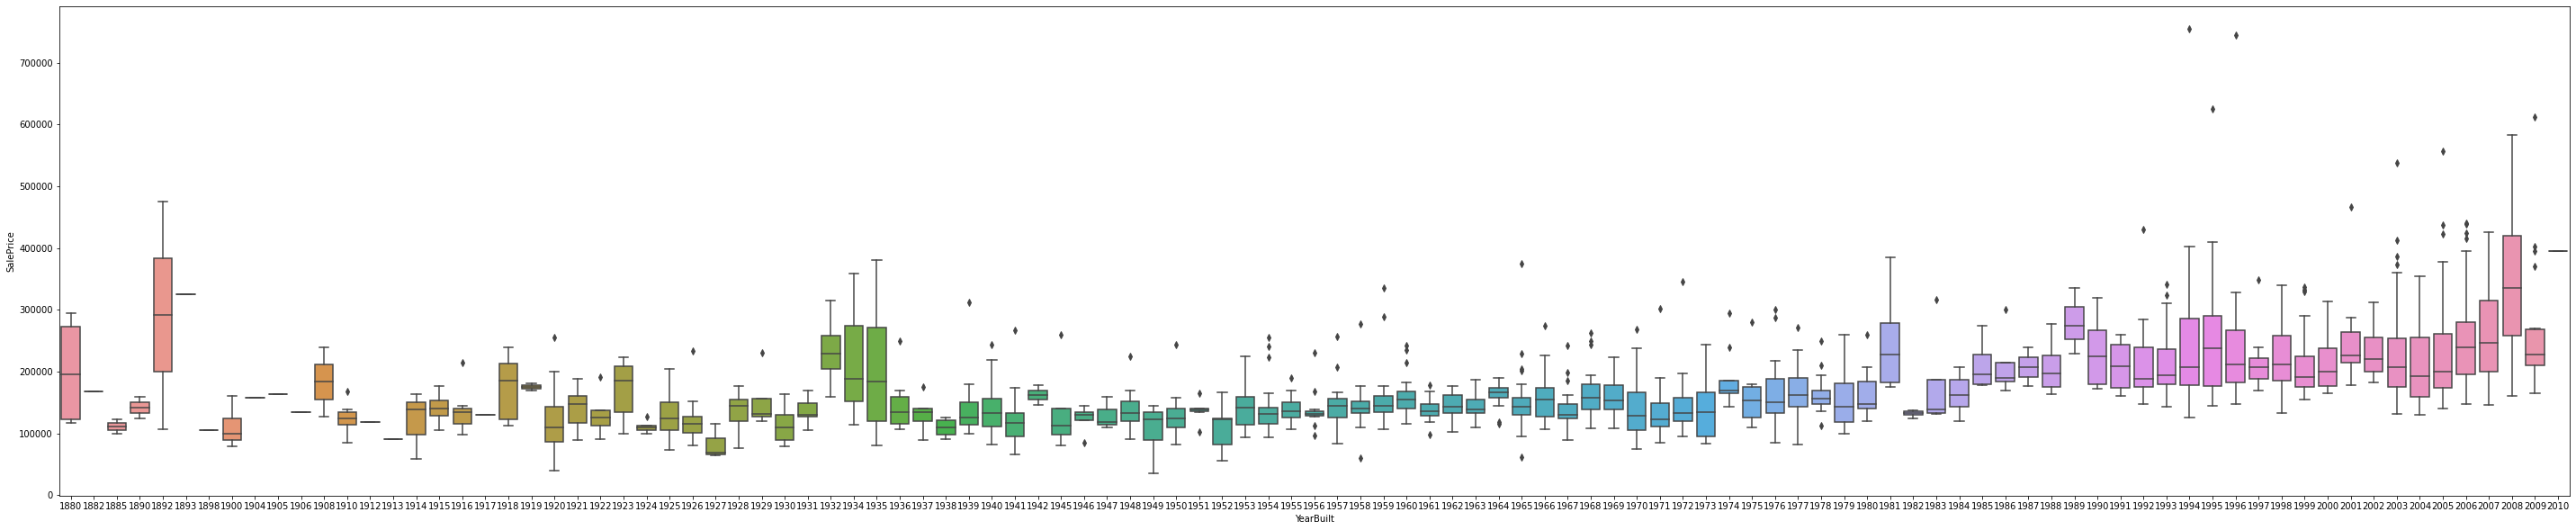

In [67]:
plt.figure(figsize=(50,10))
sns.boxplot(x="YearBuilt", y='SalePrice', data= df) 

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

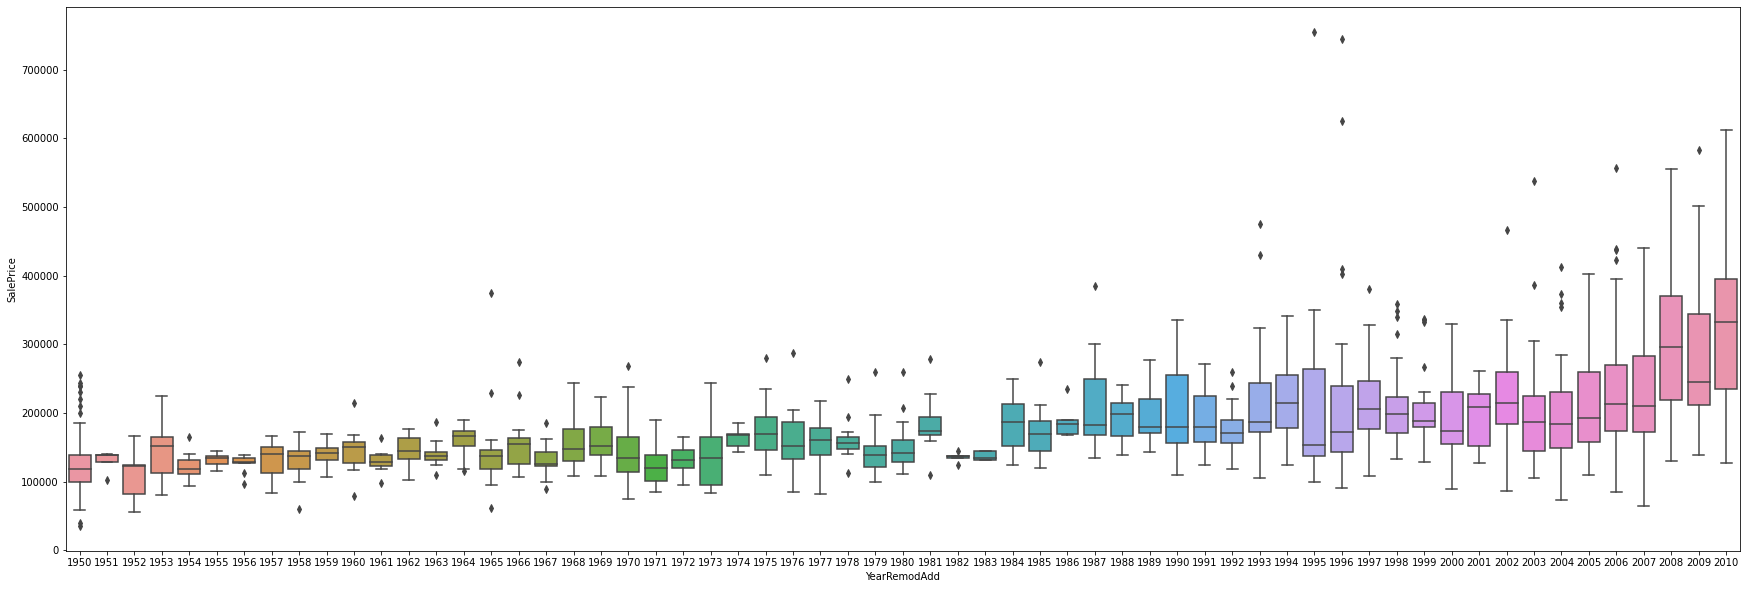

In [68]:
plt.figure(figsize=(30,10))
sns.boxplot(x="YearRemodAdd", y='SalePrice', data= df) 

<AxesSubplot:xlabel='RoofStyle', ylabel='SalePrice'>

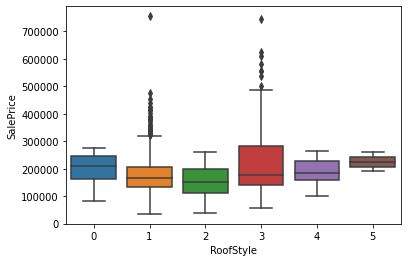

In [69]:
sns.boxplot(x="RoofStyle", y='SalePrice', data= df) 

<AxesSubplot:xlabel='RoofMatl', ylabel='SalePrice'>

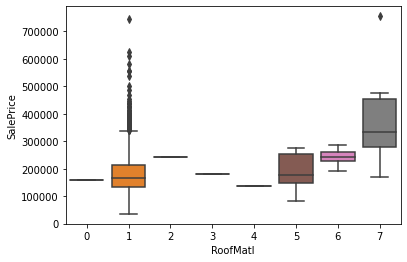

In [70]:
sns.boxplot(x="RoofMatl", y='SalePrice', data= df) 

<AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>

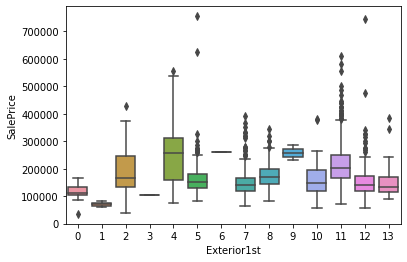

In [71]:
sns.boxplot(x="Exterior1st", y='SalePrice', data= df) 

<AxesSubplot:xlabel='Exterior2nd', ylabel='SalePrice'>

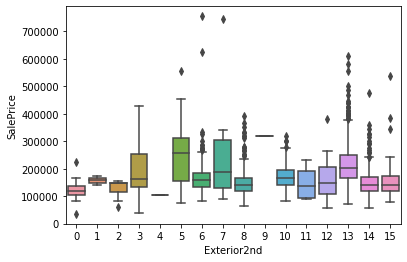

In [72]:
sns.boxplot(x="Exterior2nd", y='SalePrice', data= df) 

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

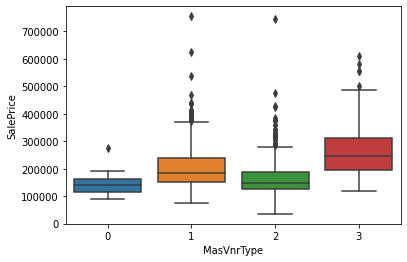

In [73]:
sns.boxplot(x="MasVnrType", y='SalePrice', data= df) 

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

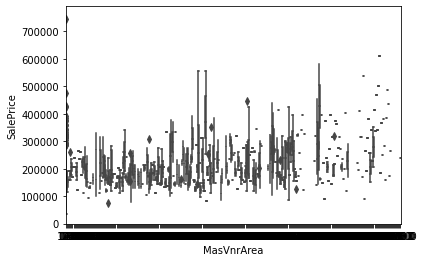

In [74]:
sns.boxplot(x="MasVnrArea", y='SalePrice', data= df)

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

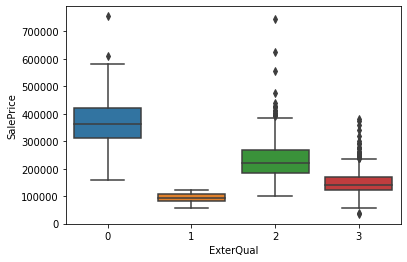

In [75]:
sns.boxplot(x="ExterQual", y='SalePrice', data= df) 

<AxesSubplot:xlabel='ExterCond', ylabel='SalePrice'>

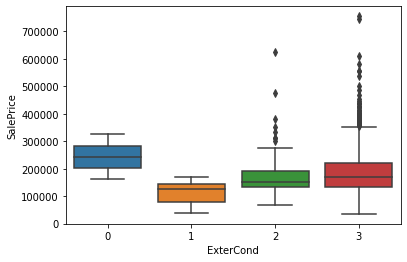

In [76]:
sns.boxplot(x="ExterCond", y='SalePrice', data= df) 

<AxesSubplot:xlabel='Foundation', ylabel='SalePrice'>

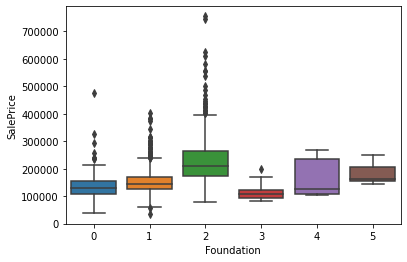

In [77]:
sns.boxplot(x="Foundation", y='SalePrice', data= df) 

<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

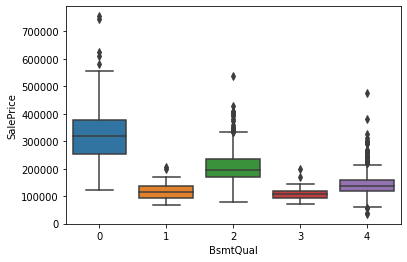

In [78]:
sns.boxplot(x="BsmtQual", y='SalePrice', data= df) 

<AxesSubplot:xlabel='BsmtCond', ylabel='SalePrice'>

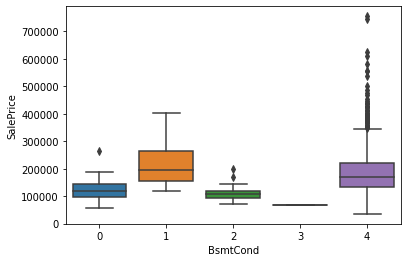

In [79]:
sns.boxplot(x="BsmtCond", y='SalePrice', data= df) 

<AxesSubplot:xlabel='BsmtExposure', ylabel='SalePrice'>

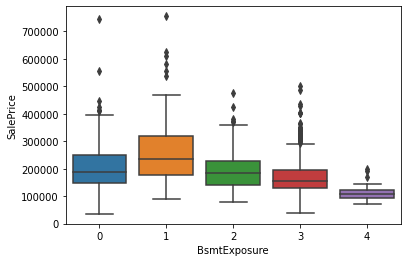

In [80]:
sns.boxplot(x="BsmtExposure", y='SalePrice', data= df) 

<AxesSubplot:xlabel='BsmtFinType1', ylabel='SalePrice'>

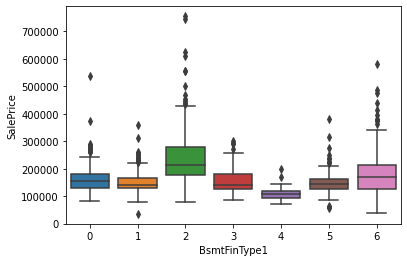

In [81]:
sns.boxplot(x="BsmtFinType1", y='SalePrice', data= df) 

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

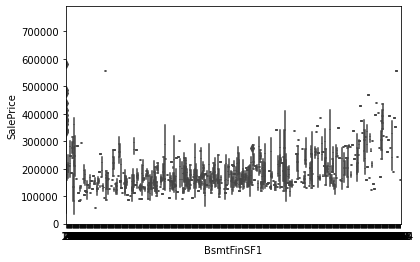

In [82]:
sns.boxplot(x="BsmtFinSF1", y='SalePrice', data= df) 

<AxesSubplot:xlabel='BsmtFinType2', ylabel='SalePrice'>

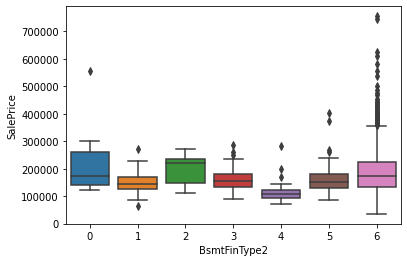

In [83]:
sns.boxplot(x="BsmtFinType2", y='SalePrice', data= df) 

<AxesSubplot:xlabel='BsmtFinSF2', ylabel='SalePrice'>

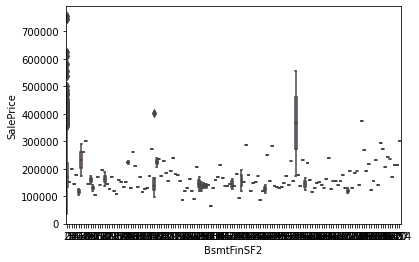

In [84]:
sns.boxplot(x="BsmtFinSF2", y='SalePrice', data= df) 

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='SalePrice'>

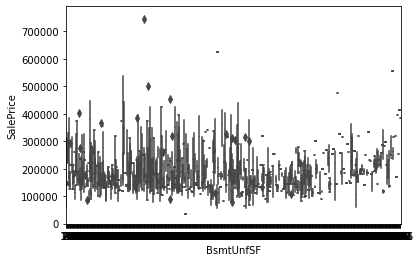

In [85]:
sns.boxplot(x="BsmtUnfSF", y='SalePrice', data= df) 

<AxesSubplot:xlabel='Heating', ylabel='SalePrice'>

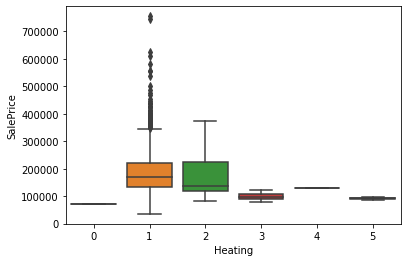

In [87]:
sns.boxplot(x="Heating", y='SalePrice', data= df) 

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

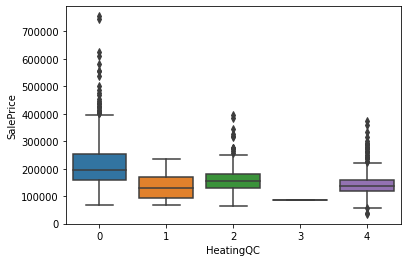

In [88]:
sns.boxplot(x="HeatingQC", y='SalePrice', data= df) 

<AxesSubplot:xlabel='CentralAir', ylabel='SalePrice'>

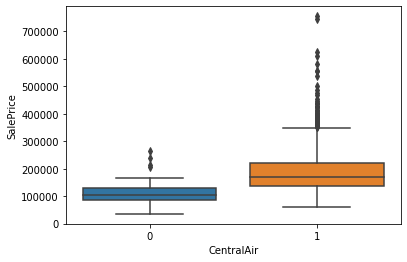

In [89]:
sns.boxplot(x="CentralAir", y='SalePrice', data= df) 

<AxesSubplot:xlabel='Electrical', ylabel='SalePrice'>

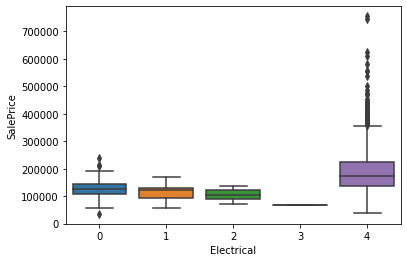

In [90]:
sns.boxplot(x="Electrical", y='SalePrice', data= df) 

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

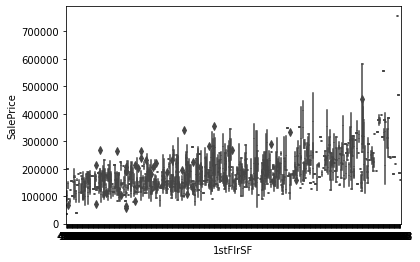

In [91]:
sns.boxplot(x="1stFlrSF", y='SalePrice', data= df) 

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

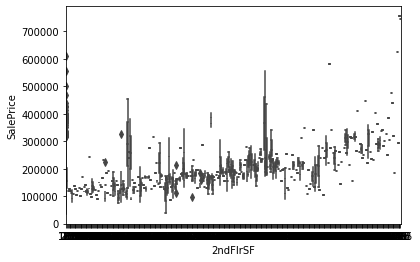

In [92]:
sns.boxplot(x="2ndFlrSF", y='SalePrice', data= df) 

<AxesSubplot:xlabel='LowQualFinSF', ylabel='SalePrice'>

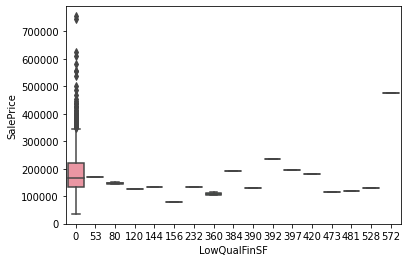

In [93]:
sns.boxplot(x="LowQualFinSF", y='SalePrice', data= df) 

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

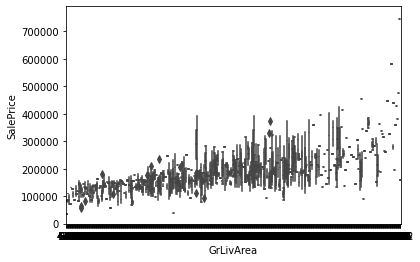

In [94]:
sns.boxplot(x="GrLivArea", y='SalePrice', data= df) 

<AxesSubplot:xlabel='BsmtFullBath', ylabel='SalePrice'>

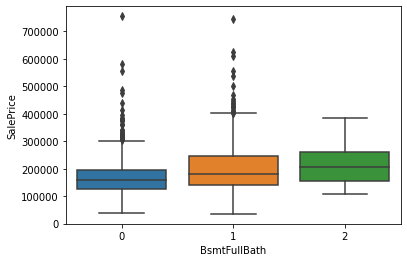

In [95]:
sns.boxplot(x="BsmtFullBath", y='SalePrice', data= df) 

<AxesSubplot:xlabel='BsmtHalfBath', ylabel='SalePrice'>

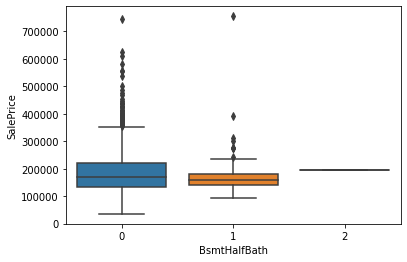

In [96]:
sns.boxplot(x="BsmtHalfBath", y='SalePrice', data= df) 

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

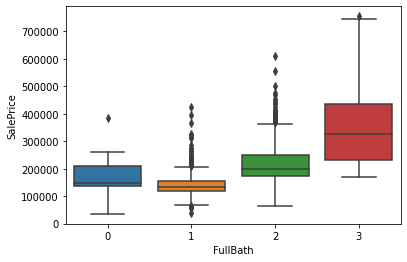

In [97]:
sns.boxplot(x="FullBath", y='SalePrice', data= df) 

<AxesSubplot:xlabel='HalfBath', ylabel='SalePrice'>

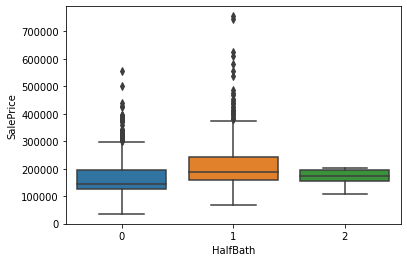

In [98]:
sns.boxplot(x="HalfBath", y='SalePrice', data= df) 

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='SalePrice'>

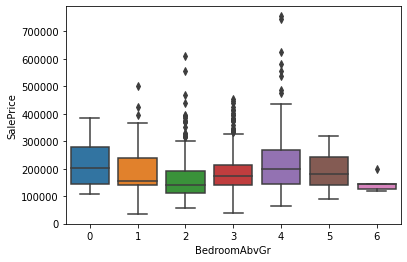

In [99]:
sns.boxplot(x="BedroomAbvGr", y='SalePrice', data= df) 

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>

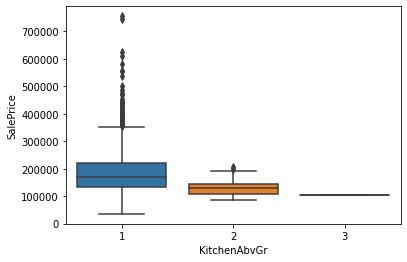

In [100]:
sns.boxplot(x="KitchenAbvGr", y='SalePrice', data= df) 

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

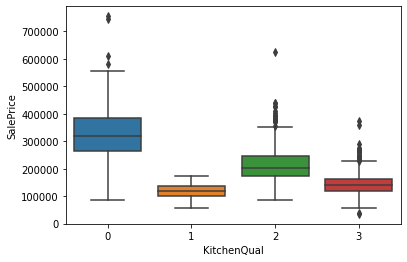

In [101]:
sns.boxplot(x="KitchenQual", y='SalePrice', data= df) 

<AxesSubplot:xlabel='Functional', ylabel='SalePrice'>

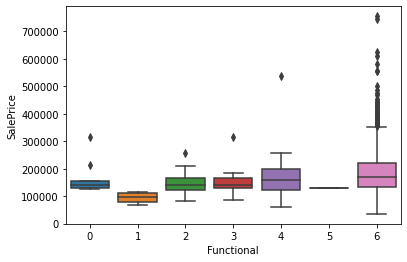

In [102]:
sns.boxplot(x="Functional", y='SalePrice', data= df) 

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

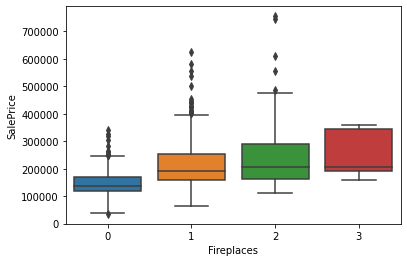

In [103]:
sns.boxplot(x="Fireplaces", y='SalePrice', data= df) 

<AxesSubplot:xlabel='FireplaceQu', ylabel='SalePrice'>

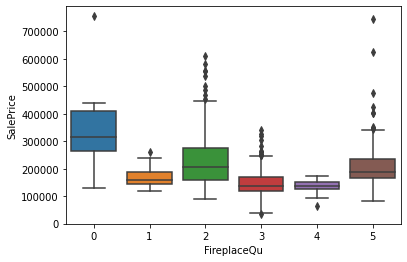

In [104]:
sns.boxplot(x="FireplaceQu", y='SalePrice', data= df) 

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

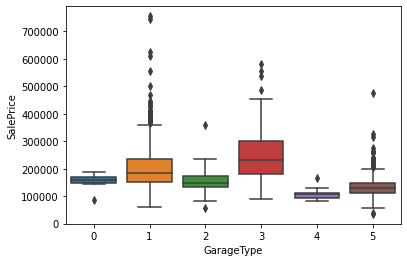

In [105]:
sns.boxplot(x="GarageType", y='SalePrice', data= df) 

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

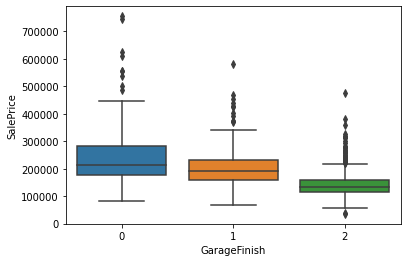

In [107]:
sns.boxplot(x="GarageFinish", y='SalePrice', data= df) 

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

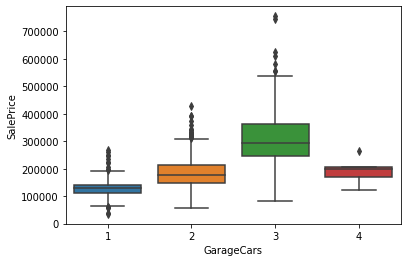

In [108]:
sns.boxplot(x="GarageCars", y='SalePrice', data= df) 

<AxesSubplot:xlabel='GarageQual', ylabel='SalePrice'>

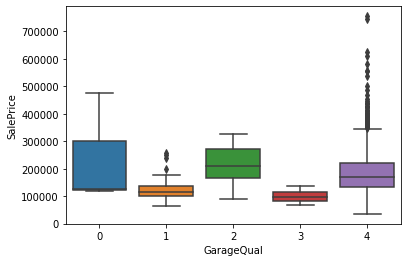

In [110]:
sns.boxplot(x="GarageQual", y='SalePrice', data= df) 

<AxesSubplot:xlabel='GarageCond', ylabel='SalePrice'>

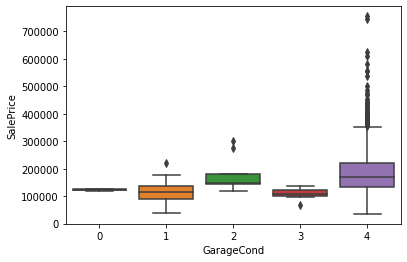

In [111]:
sns.boxplot(x="GarageCond", y='SalePrice', data= df) 

<AxesSubplot:xlabel='PavedDrive', ylabel='SalePrice'>

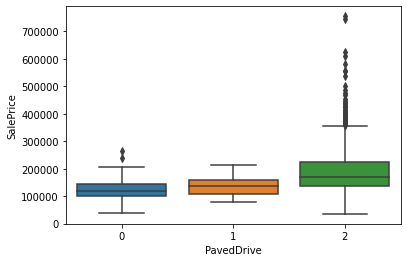

In [112]:
sns.boxplot(x="PavedDrive", y='SalePrice', data= df) 

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

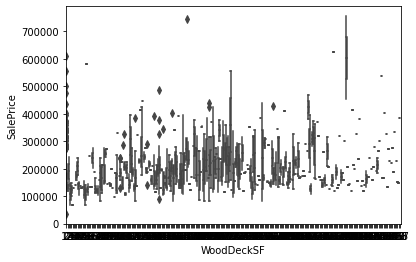

In [113]:
sns.boxplot(x="WoodDeckSF", y='SalePrice', data= df) 

<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

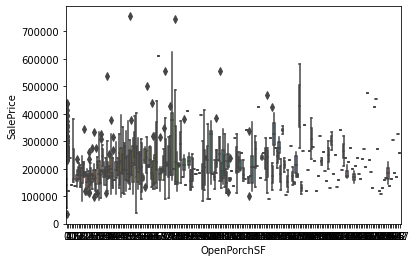

In [114]:
sns.boxplot(x="OpenPorchSF", y='SalePrice', data= df) 

<AxesSubplot:xlabel='EnclosedPorch', ylabel='SalePrice'>

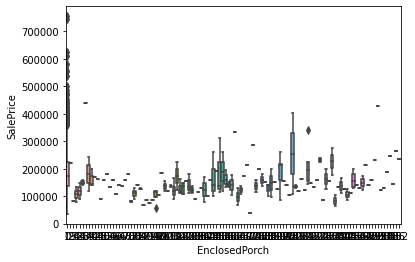

In [115]:
sns.boxplot(x="EnclosedPorch", y='SalePrice', data= df) 

<AxesSubplot:xlabel='3SsnPorch', ylabel='SalePrice'>

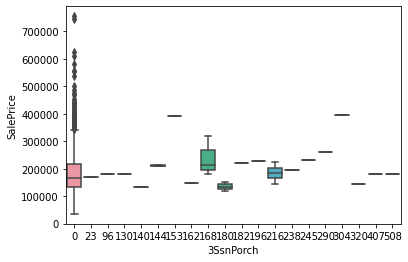

In [116]:
sns.boxplot(x="3SsnPorch", y='SalePrice', data= df) 

<AxesSubplot:xlabel='ScreenPorch', ylabel='SalePrice'>

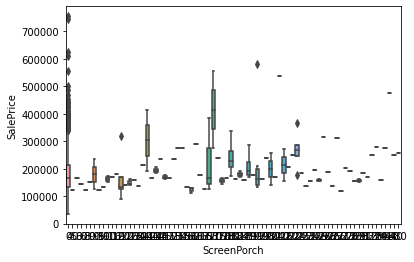

In [117]:
sns.boxplot(x="ScreenPorch", y='SalePrice', data= df) 

<AxesSubplot:xlabel='PoolArea', ylabel='SalePrice'>

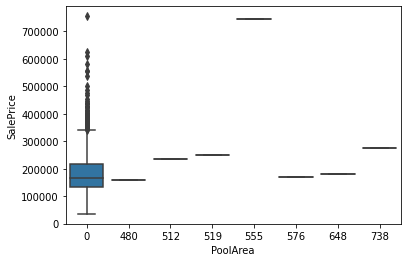

In [118]:
sns.boxplot(x="PoolArea", y='SalePrice', data= df) 

<AxesSubplot:xlabel='PoolQC', ylabel='SalePrice'>

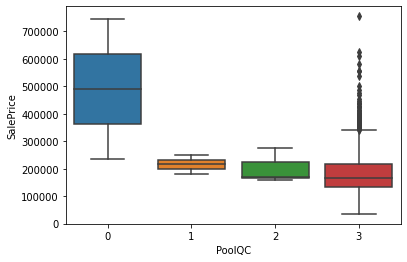

In [119]:
sns.boxplot(x="PoolQC", y='SalePrice', data= df) 

<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

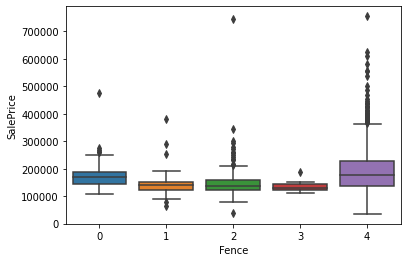

In [120]:
sns.boxplot(x="Fence", y='SalePrice', data= df) 

<AxesSubplot:xlabel='MiscFeature', ylabel='SalePrice'>

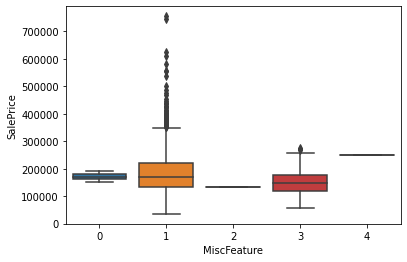

In [121]:
sns.boxplot(x="MiscFeature", y='SalePrice', data= df) 

<AxesSubplot:xlabel='MiscVal', ylabel='SalePrice'>

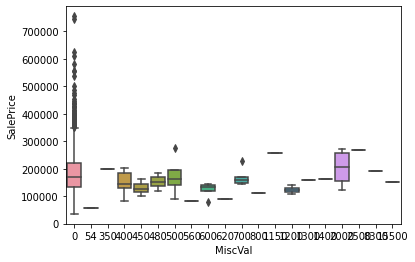

In [122]:
sns.boxplot(x="MiscVal", y='SalePrice', data= df) 

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

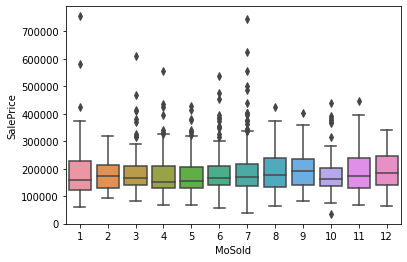

In [123]:
sns.boxplot(x="MoSold", y='SalePrice', data= df) 

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

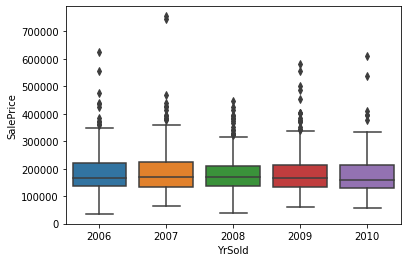

In [124]:
sns.boxplot(x="YrSold", y='SalePrice', data= df) 

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

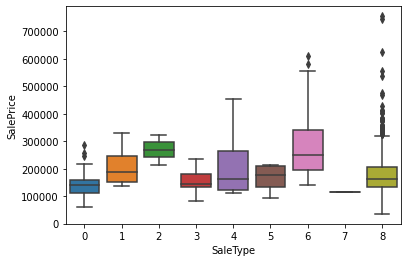

In [125]:
sns.boxplot(x="SaleType", y='SalePrice', data= df) 

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

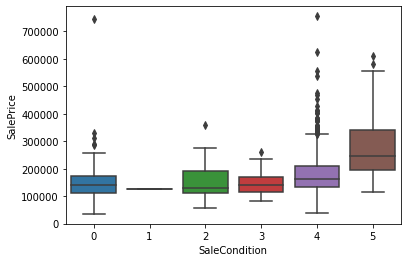

In [137]:
sns.boxplot(x="SaleCondition", y='SalePrice', data= df) 

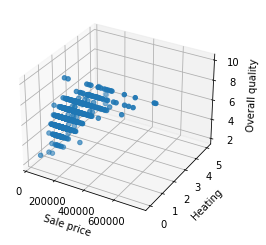

In [138]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['SalePrice']
y = df['Heating'].astype(float)

# y = df['CentralAir']
z = df['OverallQual']

ax.scatter(x, y, z)
ax.set_xlabel("Sale price")
ax.set_ylabel("Heating")
ax.set_zlabel("Overall quality")

plt.show()

In [141]:
df

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0             60         3         65.0     8450       1      1         3   
1             20         3         80.0     9600       1      1         3   
2             60         3         68.0    11250       1      1         0   
3             70         3         60.0     9550       1      1         0   
4             60         3         84.0    14260       1      1         0   
...          ...       ...          ...      ...     ...    ...       ...   
1455          60         3         62.0     7917       1      1         3   
1456          20         3         85.0    13175       1      1         3   
1457          70         3         66.0     9042       1      1         3   
1458          20         3         68.0     9717       1      1         3   
1459          20         3         75.0     9937       1      1         3   

      LandContour  Utilities  LotConfig  ...  PoolArea  PoolQC  Fence  \
0               3          0          4  ...         0       3      4   
1               3          0          2  ...         0       3      4   
2               3          0          4  ...         0       3      4   
3               3          0          0  ...         0       3      4   
4               3          0          2  ...         0       3      4   
...           ...        ...        ...  ...       ...     ...    ...   
1455            3          0          4  ...         0       3      4   
1456            3          0          4  ...         0       3      2   
1457            3          0          4  ...         0       3      0   
1458            3          0          4  ...         0       3      4   
1459            3          0          4  ...         0       3      4   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0               1        0       2    2008         8              4     208500  
1               1        0       5    2007         8              4     181500  
2               1        0       9    2008         8              4     223500  
3               1        0       2    2006         8              0     140000  
4               1        0      12    2008         8              4     250000  
...           ...      ...     ...     ...       ...            ...        ...  
1455            1        0       8    2007         8              4     175000  
1456            1        0       2    2010         8              4     210000  
1457            3     2500       5    2010         8              4     266500  
1458            1        0       4    2010         8              4     142125  
1459            1        0       6    2008         8              4     147500  

[1370 rows x 76 columns]

In [142]:
df_features = pd.DataFrame(df)


In [143]:
df_features

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0             60         3         65.0     8450       1      1         3   
1             20         3         80.0     9600       1      1         3   
2             60         3         68.0    11250       1      1         0   
3             70         3         60.0     9550       1      1         0   
4             60         3         84.0    14260       1      1         0   
...          ...       ...          ...      ...     ...    ...       ...   
1455          60         3         62.0     7917       1      1         3   
1456          20         3         85.0    13175       1      1         3   
1457          70         3         66.0     9042       1      1         3   
1458          20         3         68.0     9717       1      1         3   
1459          20         3         75.0     9937       1      1         3   

      LandContour  Utilities  LotConfig  ...  PoolArea  PoolQC  Fence  \
0               3          0          4  ...         0       3      4   
1               3          0          2  ...         0       3      4   
2               3          0          4  ...         0       3      4   
3               3          0          0  ...         0       3      4   
4               3          0          2  ...         0       3      4   
...           ...        ...        ...  ...       ...     ...    ...   
1455            3          0          4  ...         0       3      4   
1456            3          0          4  ...         0       3      2   
1457            3          0          4  ...         0       3      0   
1458            3          0          4  ...         0       3      4   
1459            3          0          4  ...         0       3      4   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0               1        0       2    2008         8              4     208500  
1               1        0       5    2007         8              4     181500  
2               1        0       9    2008         8              4     223500  
3               1        0       2    2006         8              0     140000  
4               1        0      12    2008         8              4     250000  
...           ...      ...     ...     ...       ...            ...        ...  
1455            1        0       8    2007         8              4     175000  
1456            1        0       2    2010         8              4     210000  
1457            3     2500       5    2010         8              4     266500  
1458            1        0       4    2010         8              4     142125  
1459            1        0       6    2008         8              4     147500  

[1370 rows x 76 columns]

In [144]:

df_features = df_features.drop(['SalePrice'], axis = 1)
df_target= pd.DataFrame(df["SalePrice"])

In [145]:
df_features

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0             60         3         65.0     8450       1      1         3   
1             20         3         80.0     9600       1      1         3   
2             60         3         68.0    11250       1      1         0   
3             70         3         60.0     9550       1      1         0   
4             60         3         84.0    14260       1      1         0   
...          ...       ...          ...      ...     ...    ...       ...   
1455          60         3         62.0     7917       1      1         3   
1456          20         3         85.0    13175       1      1         3   
1457          70         3         66.0     9042       1      1         3   
1458          20         3         68.0     9717       1      1         3   
1459          20         3         75.0     9937       1      1         3   

      LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC  \
0               3          0          4  ...            0         0       3   
1               3          0          2  ...            0         0       3   
2               3          0          4  ...            0         0       3   
3               3          0          0  ...            0         0       3   
4               3          0          2  ...            0         0       3   
...           ...        ...        ...  ...          ...       ...     ...   
1455            3          0          4  ...            0         0       3   
1456            3          0          4  ...            0         0       3   
1457            3          0          4  ...            0         0       3   
1458            3          0          4  ...            0         0       3   
1459            3          0          4  ...            0         0       3   

      Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         4            1        0       2    2008         8              4  
1         4            1        0       5    2007         8              4  
2         4            1        0       9    2008         8              4  
3         4            1        0       2    2006         8              0  
4         4            1        0      12    2008         8              4  
...     ...          ...      ...     ...     ...       ...            ...  
1455      4            1        0       8    2007         8              4  
1456      2            1        0       2    2010         8              4  
1457      0            3     2500       5    2010         8              4  
1458      4            1        0       4    2010         8              4  
1459      4            1        0       6    2008         8              4  

[1370 rows x 75 columns]

In [146]:
df_target

SalePrice
0        208500
1        181500
2        223500
3        140000
4        250000
...         ...
1455     175000
1456     210000
1457     266500
1458     142125
1459     147500

[1370 rows x 1 columns]

In [148]:
df_features

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0             60         3         65.0     8450       1      1         3   
1             20         3         80.0     9600       1      1         3   
2             60         3         68.0    11250       1      1         0   
3             70         3         60.0     9550       1      1         0   
4             60         3         84.0    14260       1      1         0   
...          ...       ...          ...      ...     ...    ...       ...   
1455          60         3         62.0     7917       1      1         3   
1456          20         3         85.0    13175       1      1         3   
1457          70         3         66.0     9042       1      1         3   
1458          20         3         68.0     9717       1      1         3   
1459          20         3         75.0     9937       1      1         3   

      LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC  \
0               3          0          4  ...            0         0       3   
1               3          0          2  ...            0         0       3   
2               3          0          4  ...            0         0       3   
3               3          0          0  ...            0         0       3   
4               3          0          2  ...            0         0       3   
...           ...        ...        ...  ...          ...       ...     ...   
1455            3          0          4  ...            0         0       3   
1456            3          0          4  ...            0         0       3   
1457            3          0          4  ...            0         0       3   
1458            3          0          4  ...            0         0       3   
1459            3          0          4  ...            0         0       3   

      Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         4            1        0       2    2008         8              4  
1         4            1        0       5    2007         8              4  
2         4            1        0       9    2008         8              4  
3         4            1        0       2    2006         8              0  
4         4            1        0      12    2008         8              4  
...     ...          ...      ...     ...     ...       ...            ...  
1455      4            1        0       8    2007         8              4  
1456      2            1        0       2    2010         8              4  
1457      0            3     2500       5    2010         8              4  
1458      4            1        0       4    2010         8              4  
1459      4            1        0       6    2008         8              4  

[1370 rows x 75 columns]

In [149]:
mod = sm.OLS(df_target,sm.add_constant(df_features, prepend=False))
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     96.35
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:07:28   Log-Likelihood:                -16109.
No. Observations:                1370   AIC:                         3.237e+04
Df Residuals:                    1295   BIC:                         3.276e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass     -139.0423     49.634     -2.801

[239955.43012972 242158.56289145 152870.56553503 156430.39945714
 163076.58700354 174419.21173362 216459.38917387 152324.21153072
 257069.55831857 120572.25441531 297735.65113182 188722.31416568
 113932.20491103 165657.94738116 222733.27991774 110128.68641737
 122625.56413755 167221.6727274  293974.63966702 129225.06150661
 150074.97025565 192515.31181336 179147.57300186 303195.73217629
 128810.27097585 242846.86502419 137333.62591622 174082.55857172
 309399.56137258 178566.00527595 132261.66913821 104998.21578001
 436921.481256   242871.96442589  86312.63787544 127192.62580816
 238217.9491352  377865.83470966 260305.69406914 232642.55813995
 228342.78982571 147992.90353726 262427.318322   117085.72438319
 123359.68458384 217251.4524437  209829.1386769  374465.43287708
 118464.75880243 113744.57255425 309318.00838674 304975.43708401
 319241.27054414 285640.701181   117465.58227839 149866.86351297
 243893.51004104 245072.60448015 137835.4290093  223333.9723822
 214393.1999408  134046.44

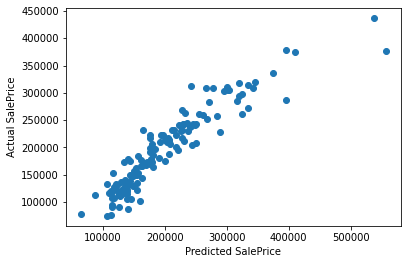

In [150]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#Split the data
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.1, random_state=1)
#Lassoisye 
lass = Lasso()
lass.fit(X_train,y_train)
ypred = lass.predict(X_test)
print(ypred)
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.scatter(y_test,ypred)
print('Lasso R-squared:', lass.score(X_test, y_test))

In [151]:
from math import sqrt
from sklearn.metrics import mean_squared_error
sqrt(mean_squared_error(y_test, ypred))

31195.455050476594

In [152]:
df_features

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0             60         3         65.0     8450       1      1         3   
1             20         3         80.0     9600       1      1         3   
2             60         3         68.0    11250       1      1         0   
3             70         3         60.0     9550       1      1         0   
4             60         3         84.0    14260       1      1         0   
...          ...       ...          ...      ...     ...    ...       ...   
1455          60         3         62.0     7917       1      1         3   
1456          20         3         85.0    13175       1      1         3   
1457          70         3         66.0     9042       1      1         3   
1458          20         3         68.0     9717       1      1         3   
1459          20         3         75.0     9937       1      1         3   

      LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC  \
0               3          0          4  ...            0         0       3   
1               3          0          2  ...            0         0       3   
2               3          0          4  ...            0         0       3   
3               3          0          0  ...            0         0       3   
4               3          0          2  ...            0         0       3   
...           ...        ...        ...  ...          ...       ...     ...   
1455            3          0          4  ...            0         0       3   
1456            3          0          4  ...            0         0       3   
1457            3          0          4  ...            0         0       3   
1458            3          0          4  ...            0         0       3   
1459            3          0          4  ...            0         0       3   

      Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         4            1        0       2    2008         8              4  
1         4            1        0       5    2007         8              4  
2         4            1        0       9    2008         8              4  
3         4            1        0       2    2006         8              0  
4         4            1        0      12    2008         8              4  
...     ...          ...      ...     ...     ...       ...            ...  
1455      4            1        0       8    2007         8              4  
1456      2            1        0       2    2010         8              4  
1457      0            3     2500       5    2010         8              4  
1458      4            1        0       4    2010         8              4  
1459      4            1        0       6    2008         8              4  

[1370 rows x 75 columns]

[239955.43012972 242158.56289145 152870.56553503 156430.39945714
 163076.58700354 174419.21173362 216459.38917387 152324.21153072
 257069.55831857 120572.25441531 297735.65113182 188722.31416568
 113932.20491103 165657.94738116 222733.27991774 110128.68641737
 122625.56413755 167221.6727274  293974.63966702 129225.06150661
 150074.97025565 192515.31181336 179147.57300186 303195.73217629
 128810.27097585 242846.86502419 137333.62591622 174082.55857172
 309399.56137258 178566.00527595 132261.66913821 104998.21578001
 436921.481256   242871.96442589  86312.63787544 127192.62580816
 238217.9491352  377865.83470966 260305.69406914 232642.55813995
 228342.78982571 147992.90353726 262427.318322   117085.72438319
 123359.68458384 217251.4524437  209829.1386769  374465.43287708
 118464.75880243 113744.57255425 309318.00838674 304975.43708401
 319241.27054414 285640.701181   117465.58227839 149866.86351297
 243893.51004104 245072.60448015 137835.4290093  223333.9723822
 214393.1999408  134046.44

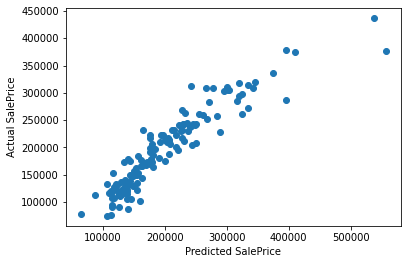

In [153]:
#Q2a
#Split the data
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.1, random_state=1)
#Lassoisye 
lass = Lasso()
lass.fit(X_train,y_train)
ypred = lass.predict(X_test)
print(ypred)
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.scatter(y_test,ypred)
print('Lasso R-squared:', lass.score(X_test, y_test))


In [154]:
from math import sqrt
from sklearn.metrics import mean_squared_error
sqrt(mean_squared_error(y_test, ypred))

31195.455050476594

[[240189.59837967]
 [243509.93133726]
 [152387.32359811]
 [156178.75198001]
 [162631.40795749]
 [174800.80996826]
 [216578.36248804]
 [152961.69108139]
 [258002.13715695]
 [120578.6145395 ]
 [297072.92737844]
 [189814.89422463]
 [113374.97313141]
 [165625.20517096]
 [222881.96485798]
 [109288.21882477]
 [122464.68333415]
 [167428.62552749]
 [293774.00825484]
 [128563.30756367]
 [149664.56060903]
 [192243.01769832]
 [179308.29901378]
 [304160.72789201]
 [128344.59158391]
 [242704.58705496]
 [137041.25097527]
 [174018.08995449]
 [310132.72615744]
 [179536.37414487]
 [133186.99155901]
 [104401.35750625]
 [435084.73458853]
 [243111.22935724]
 [ 86168.41467567]
 [126751.73698786]
 [237632.16033953]
 [377272.12035298]
 [261347.03173215]
 [233075.6076289 ]
 [228346.55005579]
 [148202.15271922]
 [262112.42727227]
 [116049.4106402 ]
 [123366.90833576]
 [217547.98309374]
 [210094.14276766]
 [374722.83732873]
 [118437.72248693]
 [113320.35246744]
 [306484.76011141]
 [303219.66669678]
 [318880.732

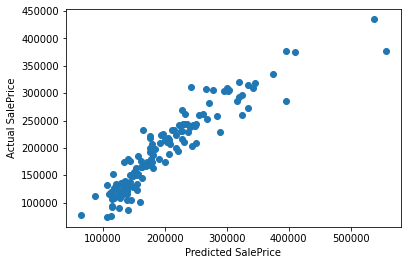

In [155]:
ridge = Ridge()
ridge.fit(X_train,y_train)
ypred = ridge.predict(X_test)
print(ypred)
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.scatter(y_test,ypred)
print('Ridge R-squared:', ridge.score(X_test, y_test))

In [156]:
from math import sqrt
from sklearn.metrics import mean_squared_error
sqrt(mean_squared_error(y_test, ypred))

31240.031552387947

C:\Users\Home\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.303e+11, tolerance: 7.540e+08
  model = cd_fast.enet_coordinate_descent(


[230354.90810331 265070.8386591  133878.39401343 158321.11093104
 169924.99290148 166787.58963025 219635.06825811 168544.07136015
 266249.69993108 125888.48919699 269605.34336127 194968.21811807
 126880.10966177 176056.69701897 216085.75671639 109696.02079939
 116442.79475309 168205.73441135 293171.66228284 114994.36659164
 148471.92159129 203650.24225809 183685.16707282 296692.22215453
 133825.5143855  237198.58735534 136709.42981856 167410.61474306
 316845.20115753 160618.6951978  147114.92028552 113098.59938341
 433125.02265274 249329.85323944  84063.24133472 131143.37867944
 235423.33696408 353039.184585   254303.55854296 241335.14587365
 223456.08313255 143139.74877868 254534.3637357  114886.15487744
 128002.70175418 212048.43029975 210302.50716704 382157.44204706
 127160.00045388 105910.39120321 302131.84882925 292687.71819945
 310200.54882965 287452.93809004 102918.56598416 153249.71957247
 249755.60619677 237250.74610206 128865.27589059 224176.24404189
 213254.17491453 135929.2

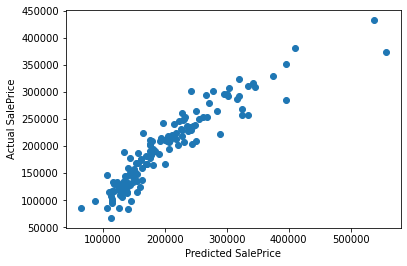

In [157]:
en = ElasticNet()
en.fit(X_train,y_train)
ypred = en.predict(X_test)
print(ypred)
plt.xlabel('Predicted SalePrice')
plt.ylabel('Actual SalePrice')
plt.scatter(y_test,ypred)
print('ElasticNet R-squared:', en.score(X_test, y_test))

In [158]:
sqrt(mean_squared_error(y_test, ypred))

31644.946543875096

# END OF CODE